# Michelle Kouba
### Using Clustering to Examine ALS Disease Progression

In [12]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
# Turning off warnings
warnings.filterwarnings('ignore')

In [1]:
# Mounting my drive
import os
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
os.chdir('/content/drive/My Drive/GitHub/Portfolio/Project 2 - ALS Clustering')
!pwd

Mounted at /content/drive
/content/drive/My Drive/GitHub/Portfolio/Project 2 - ALS Clustering


## Exploratory Data Analysis

In [4]:
# Opening ALS datafile and inspecting it
df = pd.read_csv('als_data.csv')
df.head()

ID  Age_mean  Albumin_max  Albumin_median  Albumin_min  Albumin_range  \
0   1        65         57.0            40.5         38.0       0.066202   
1   2        48         45.0            41.0         39.0       0.010453   
2   3        38         50.0            47.0         45.0       0.008929   
3   4        63         47.0            44.0         41.0       0.012111   
4   5        63         47.0            45.5         42.0       0.008292   

   ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  ALSFRS_Total_min  ...  \
0     -0.965608                30                 28.0                22  ...   
1     -0.921717                37                 33.0                21  ...   
2     -0.914787                24                 14.0                10  ...   
3     -0.598361                30                 29.0                24  ...   
4     -0.444039                32                 27.5                20  ...   

   Sodium_min  Sodium_range  SubjectID  trunk_max  trunk_median  trunk_min  \
0       143.0      0.017422        533          8           7.0          7   
1       136.0      0.010453        649          8           7.0          5   
2       140.0      0.008929       1234          5           0.0          0   
3       138.0      0.012469       2492          5           5.0          3   
4       138.0      0.008292       2956          6           4.0          1   

   trunk_range  Urine.Ph_max  Urine.Ph_median  Urine.Ph_min  
0     0.002646           6.0              6.0           6.0  
1     0.005386           7.0              5.0           5.0  
2     0.008929           6.0              5.0           5.0  
3     0.004988           7.0              6.0           5.0  
4     0.008489           6.0              5.0           5.0  

[5 rows x 101 columns]

In [5]:
# Checking for missing values
df.isnull().sum()

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64

In [ ]:
# None of the variables are missing any data.

In [6]:
# Checking how many variables and respondents we have.
df.shape

(2223, 101)

In [8]:
# Getting more information about the 101 variables.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Columns: 101 entries, ID to Urine.Ph_min
dtypes: float64(75), int64(26)
memory usage: 1.7 MB
None


In [9]:
# Further inspecting the dataframe
print(df.describe())

                ID     Age_mean  Albumin_max  Albumin_median  Albumin_min  \
count  2223.000000  2223.000000  2223.000000     2223.000000  2223.000000   
mean   1214.874944    54.550157    47.011134       43.952542    40.766347   
std     696.678300    11.396546     3.233980        2.654804     3.193087   
min       1.000000    18.000000    37.000000       34.500000    24.000000   
25%     614.500000    47.000000    45.000000       42.000000    39.000000   
50%    1213.000000    55.000000    47.000000       44.000000    41.000000   
75%    1815.500000    63.000000    49.000000       46.000000    43.000000   
max    2424.000000    81.000000    70.300000       51.100000    49.000000   

       Albumin_range  ALSFRS_slope  ALSFRS_Total_max  ALSFRS_Total_median  \
count    2223.000000   2223.000000       2223.000000          2223.000000   
mean        0.013779     -0.728274         31.692308            27.104926   
std         0.009567      0.622329          5.314228             6.633643  

We have 2223 respondents with data collected across 101 different medical measures.  Many of these measures have a min/max/median/range and appear to be lab results based on blood tests I'm guessing.  Before I do any exploratory data analysis with graphs given the large amount of numerical data, I'll explore literature/the internet to drop any variables not having to do with ALS.

ALS stands for amyotropic lateral sclerosis (in Latin the roots mean no muscle nourishment).  A quick glance at the variables tells me they are all likely impacted by ALS.  ALFRS is an ALS functioning score.  Liver enzymes and kidney function are affected by ALS so all variables dealing with those will remain.  Most of the rest of the data appears to be blood panel measures or hands/feets/mouth tremors or other symptoms (which I'm guessing are symptoms of the progression of the disease).  I'm leaving in the rest of the variables (including gender) as the progression of the disease might differ between genders.  I might take it out later depending on the clustering of the data.  Clustering of symptoms is likely an exercise in either those with ALS or not, with possibly those with ALS clustered by the progression of the disease or perhaps there are a few different varieties of the disease.  

In [10]:
# Dropping ID variables
df = df.drop('ID', axis=1)
df = df.drop('SubjectID', axis=1)

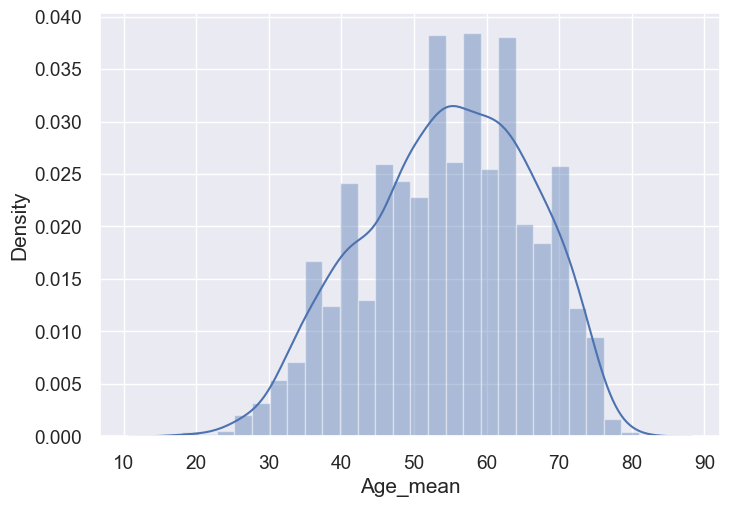

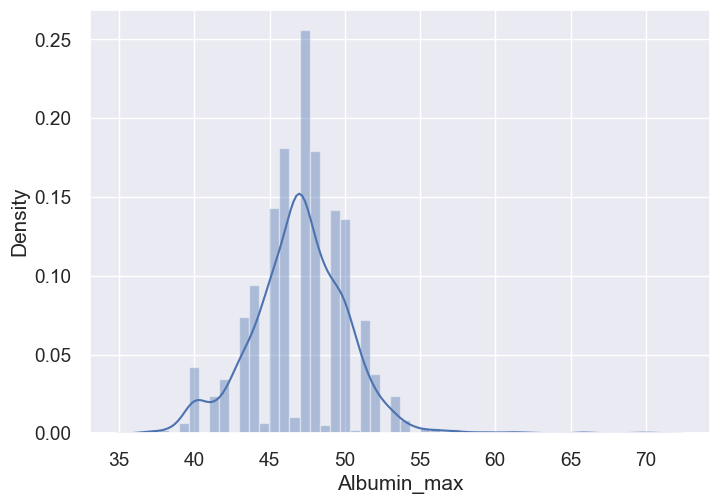

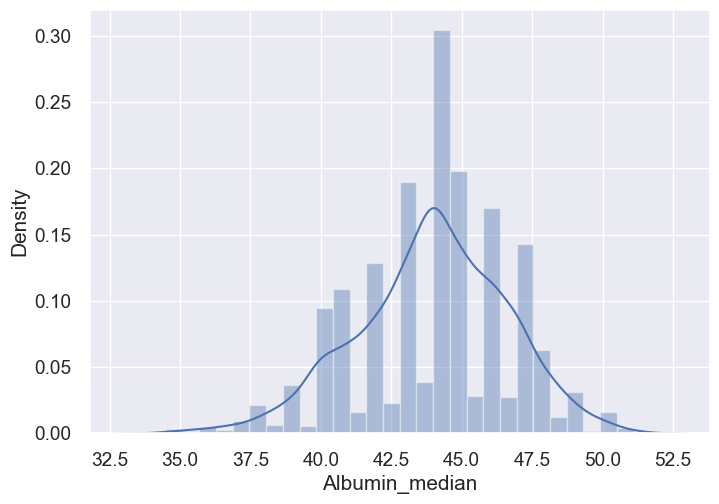

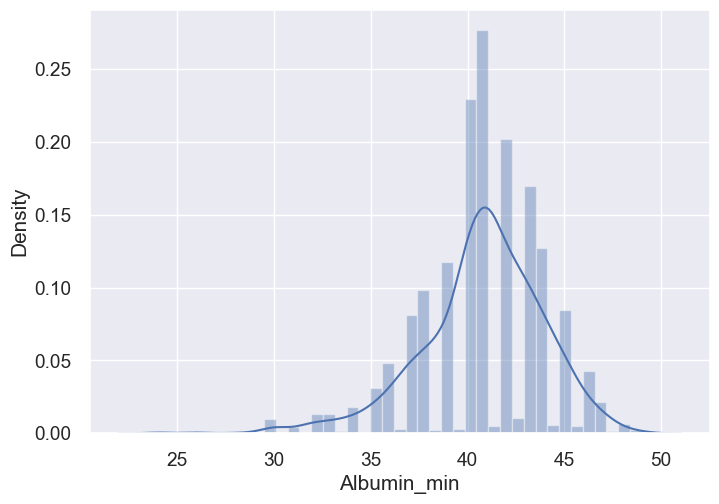

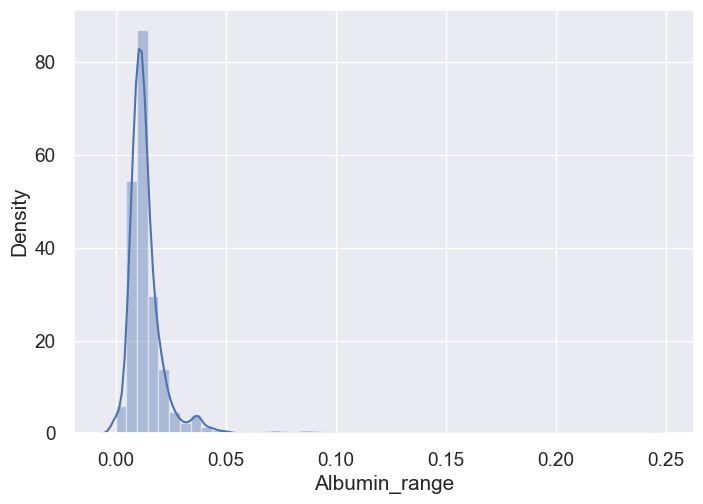

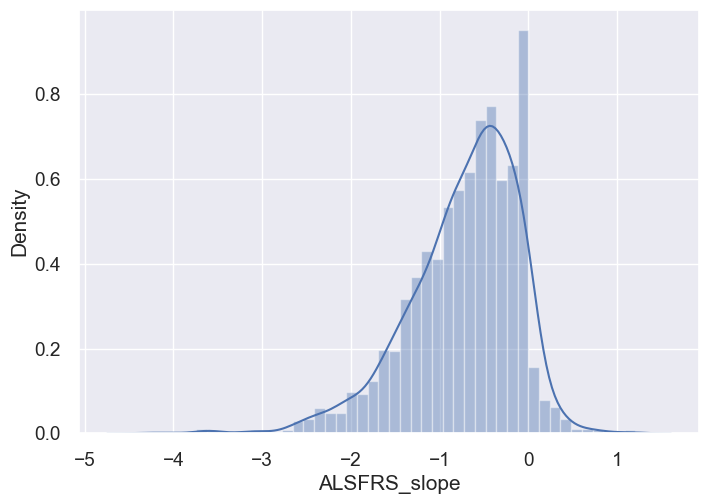

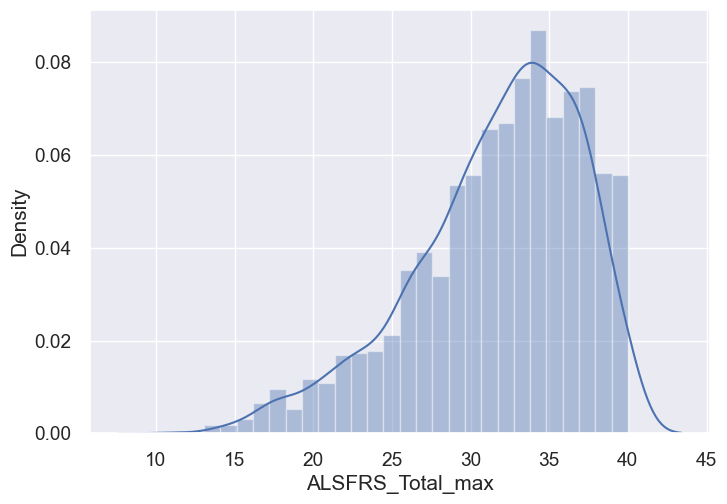

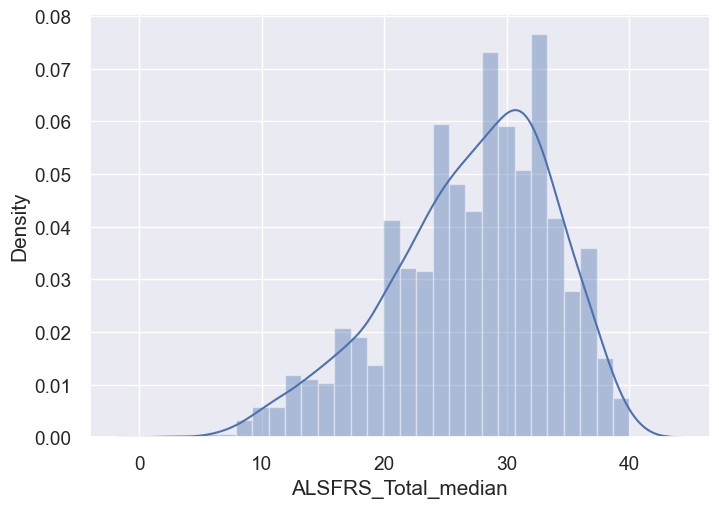

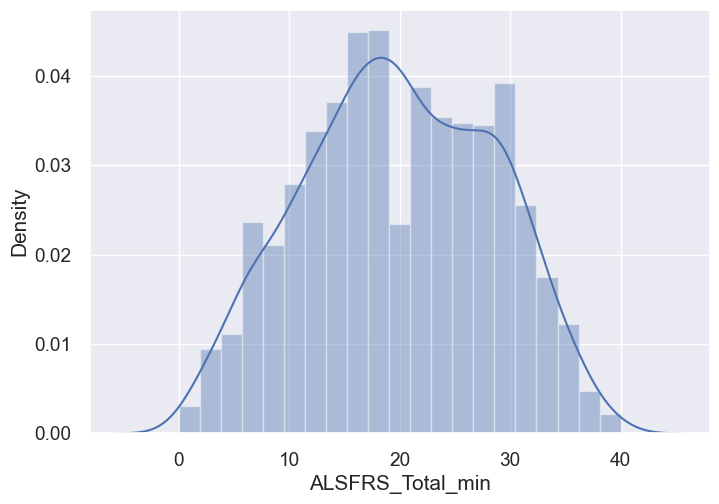

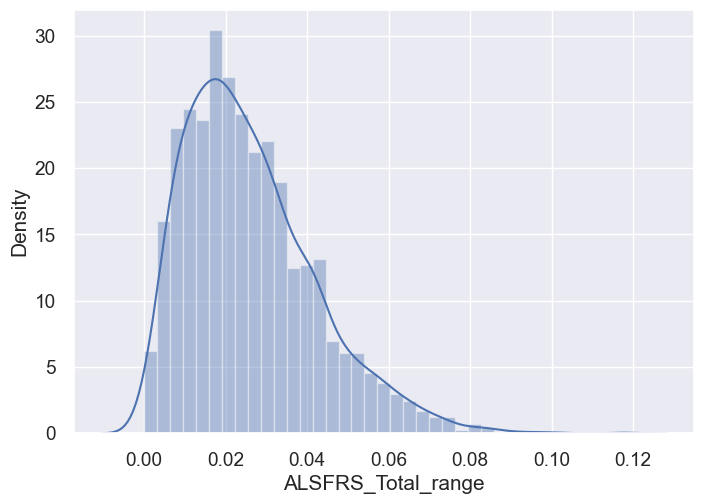

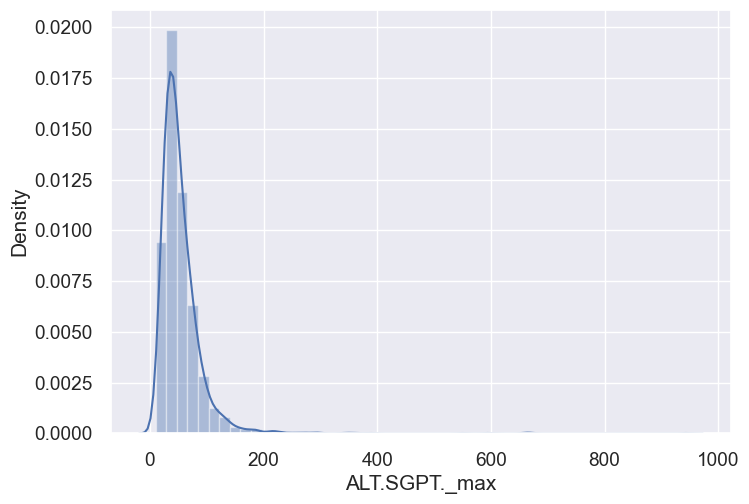

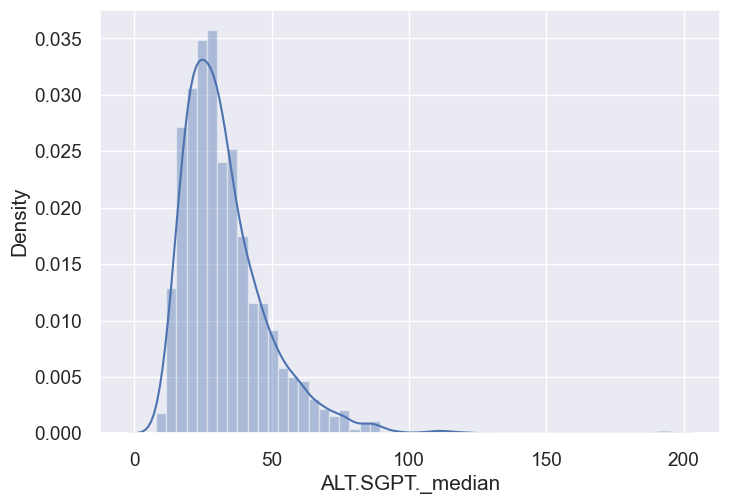

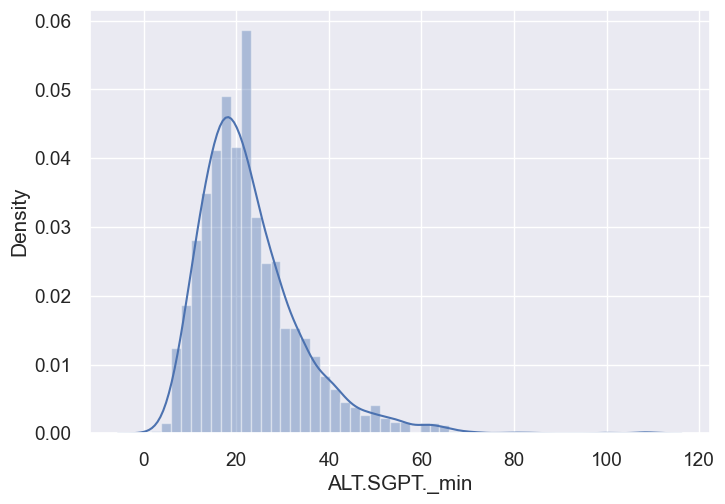

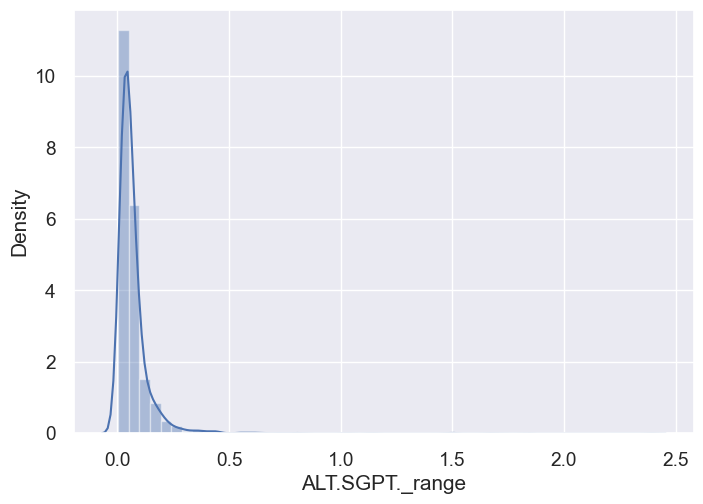

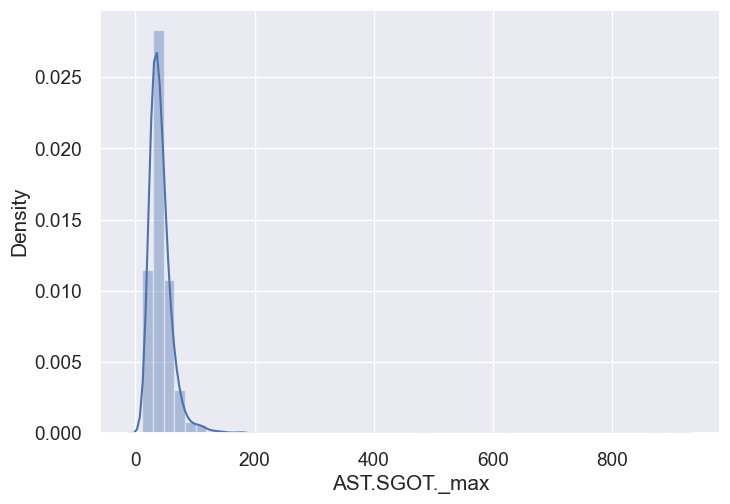

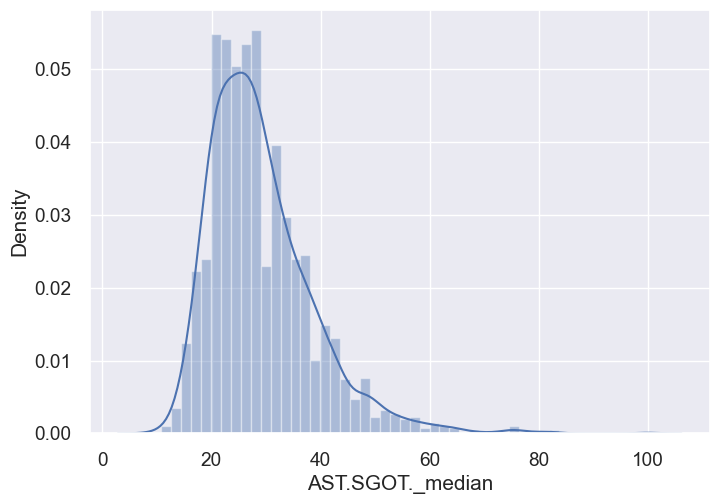

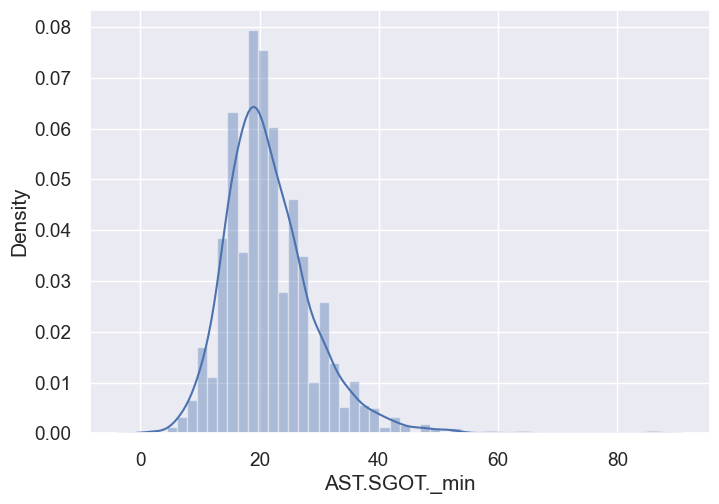

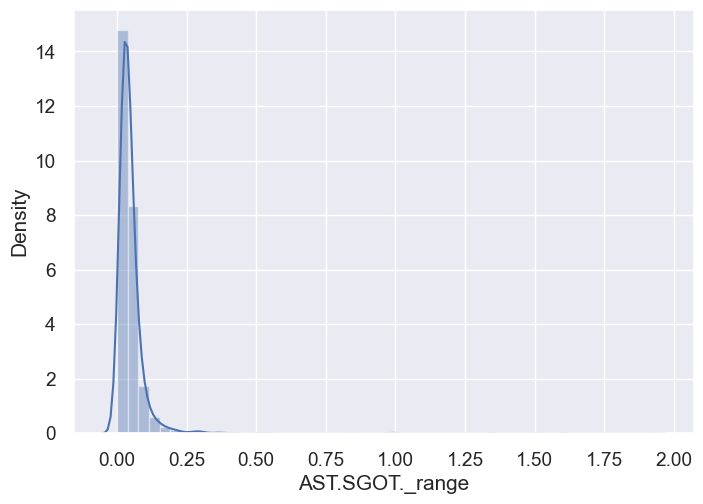

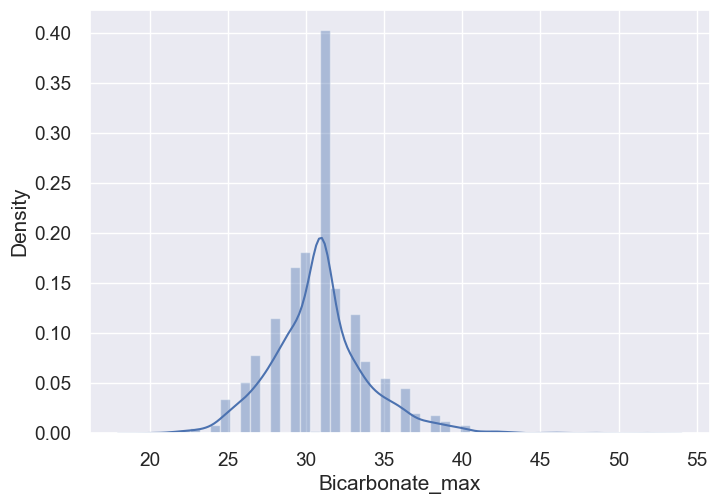

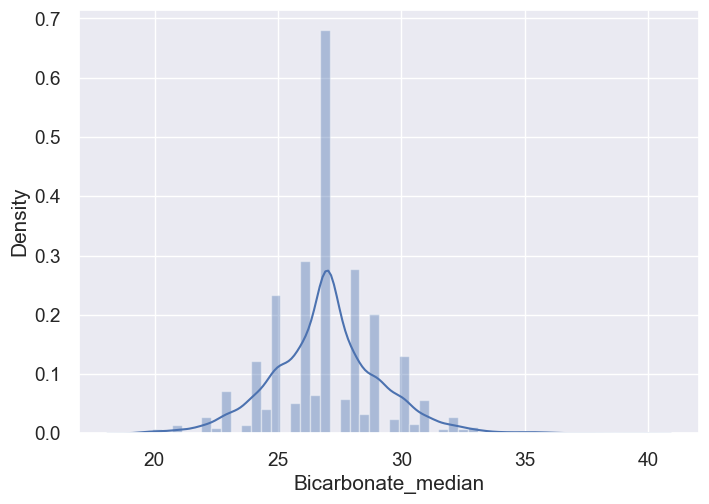

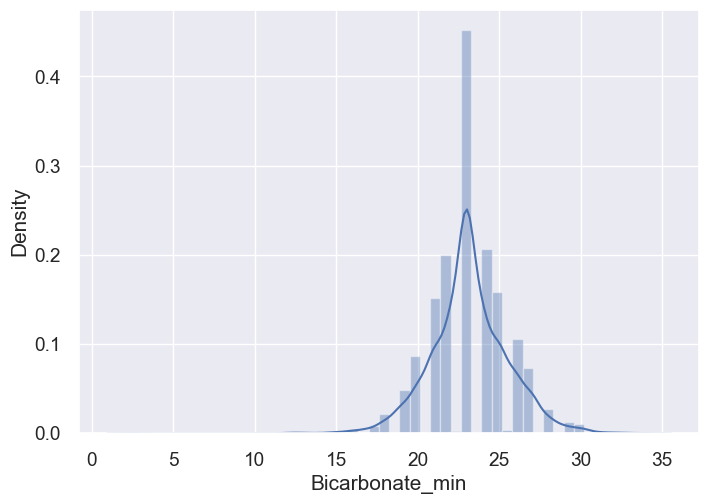

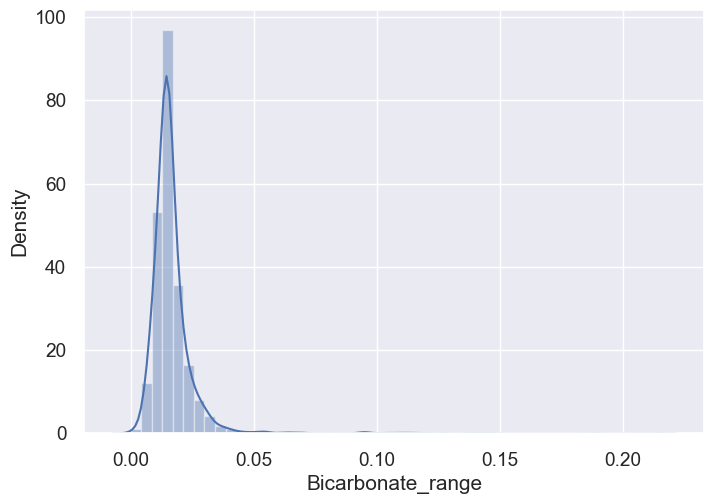

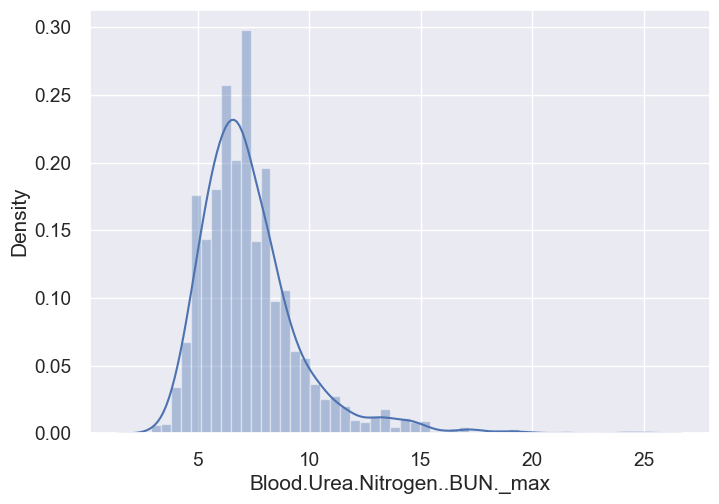

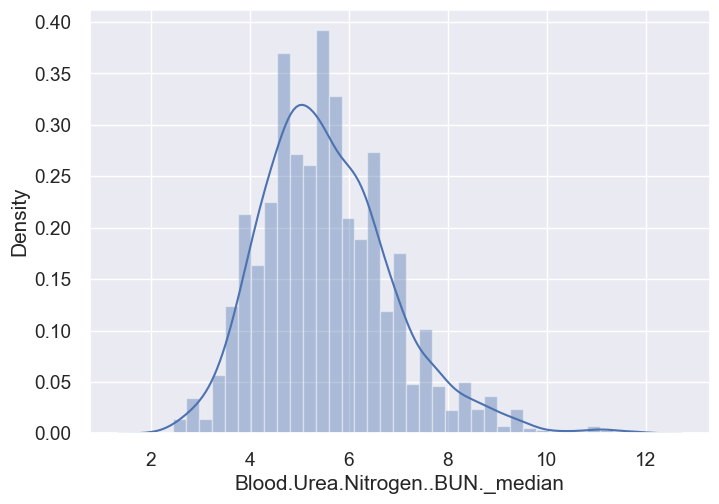

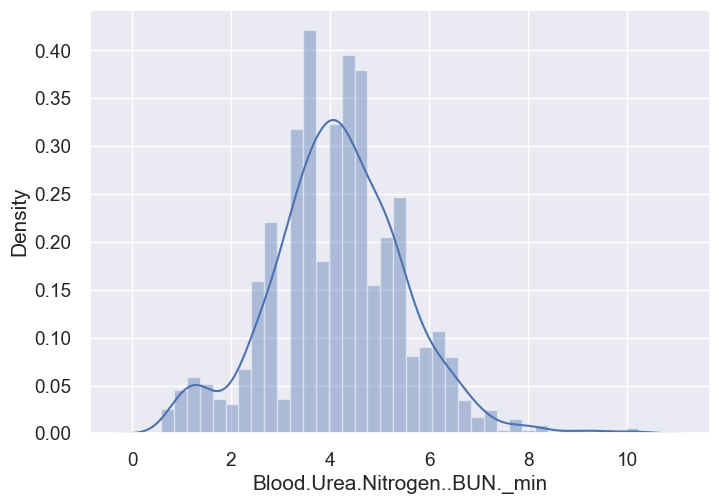

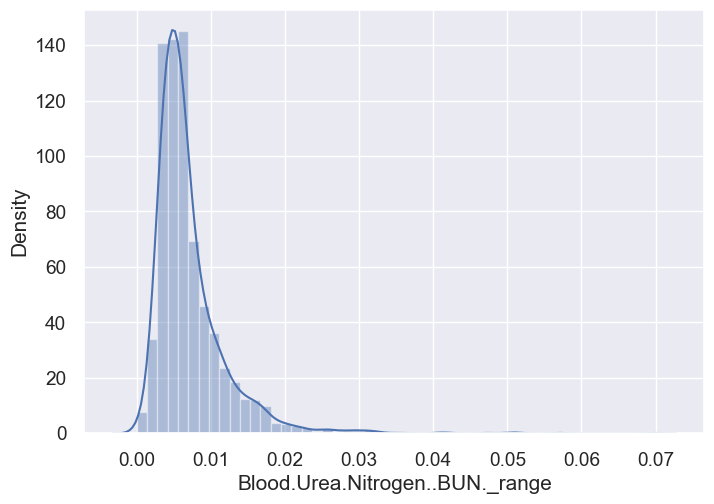

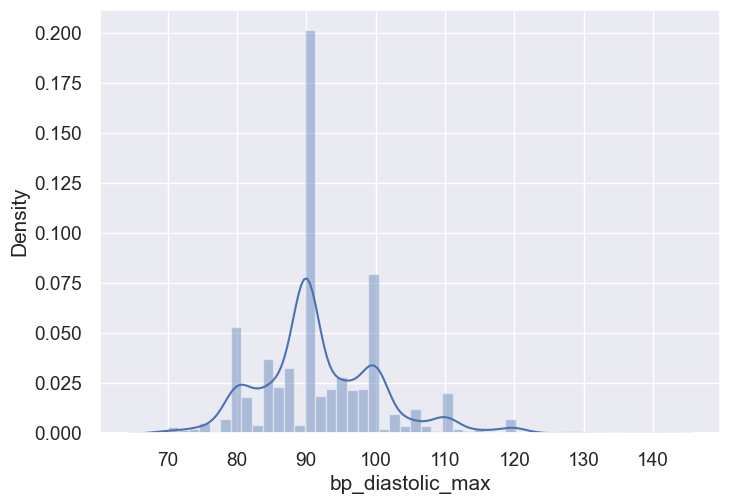

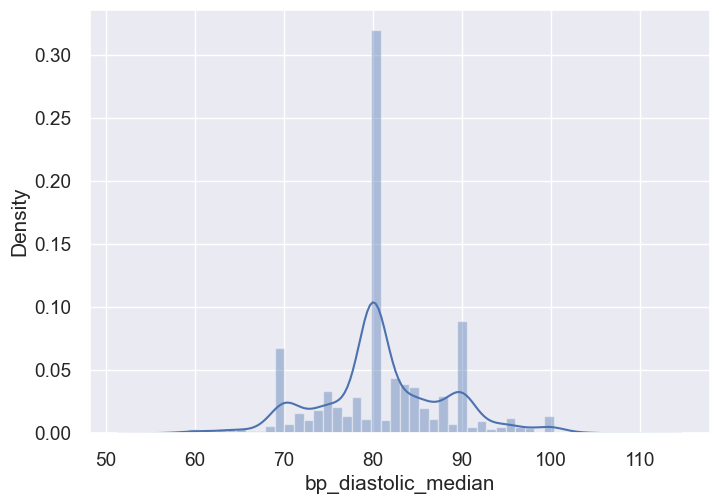

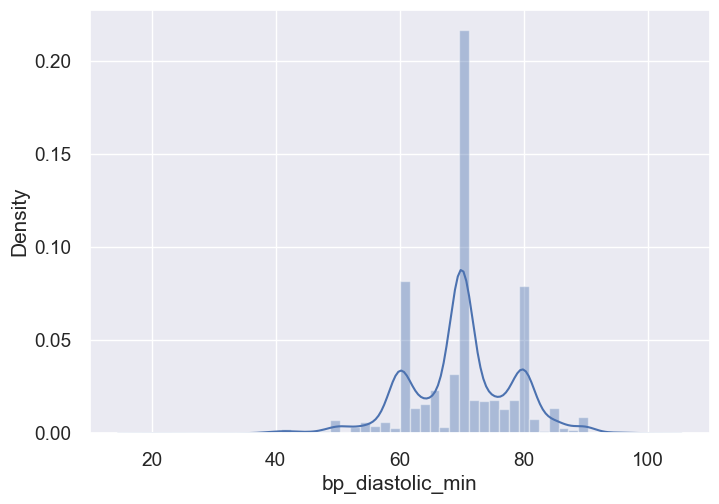

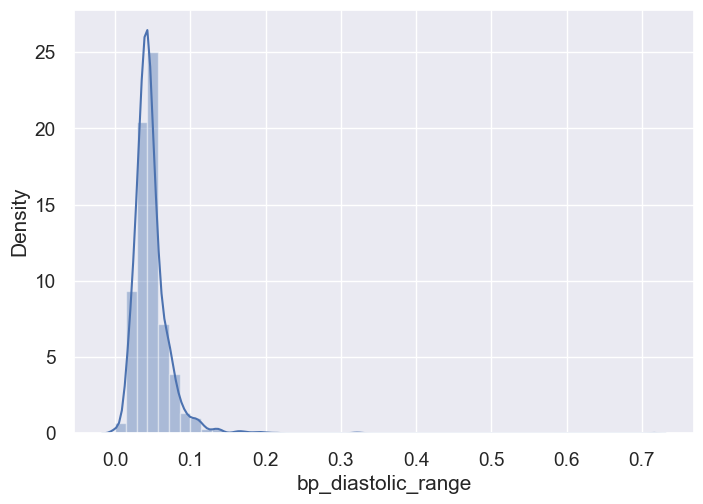

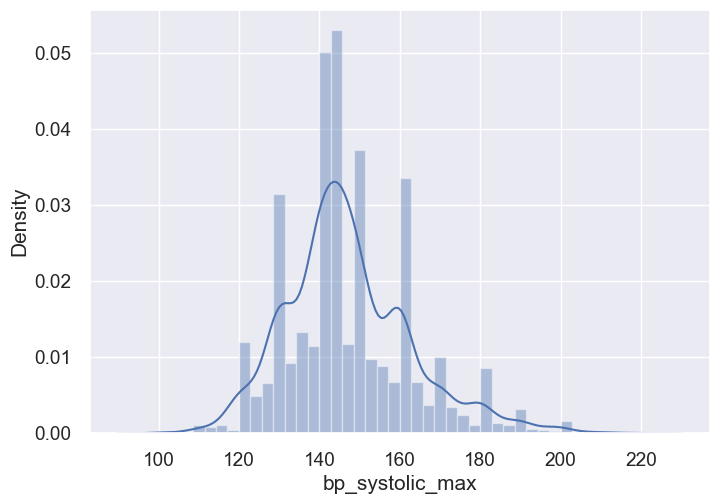

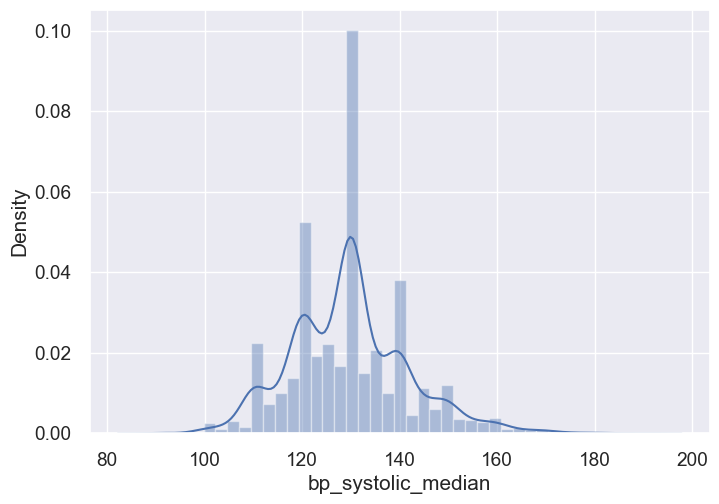

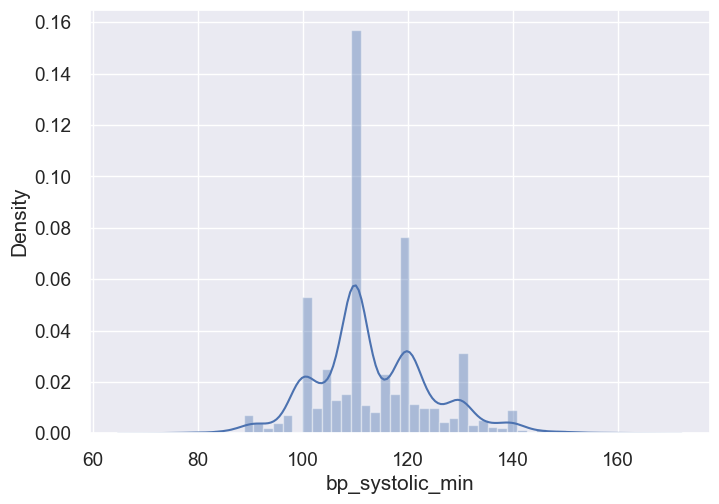

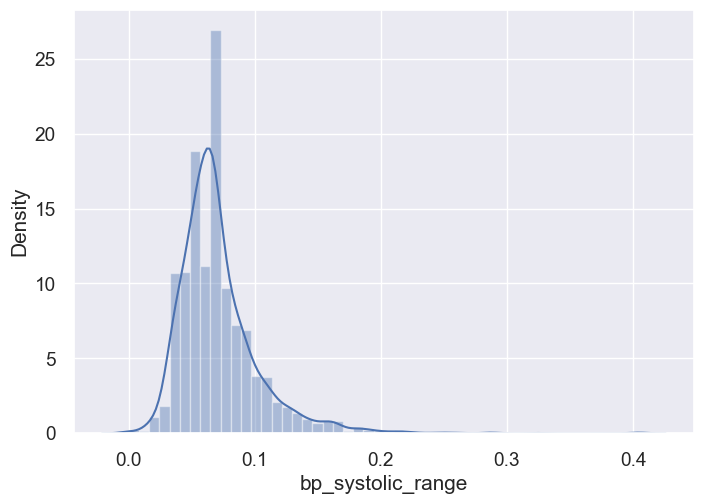

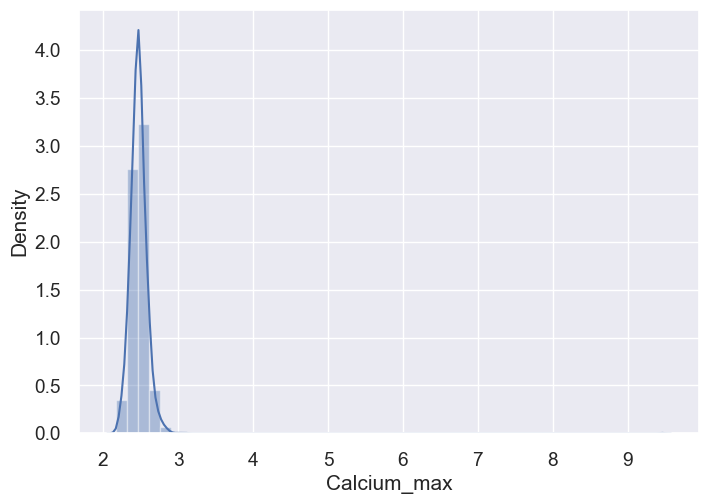

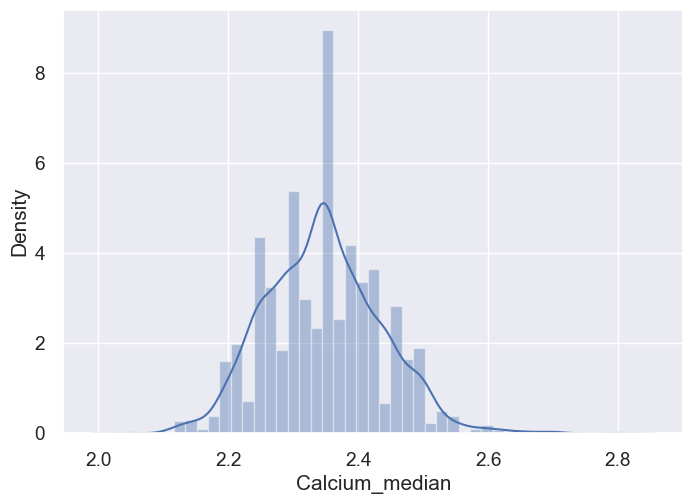

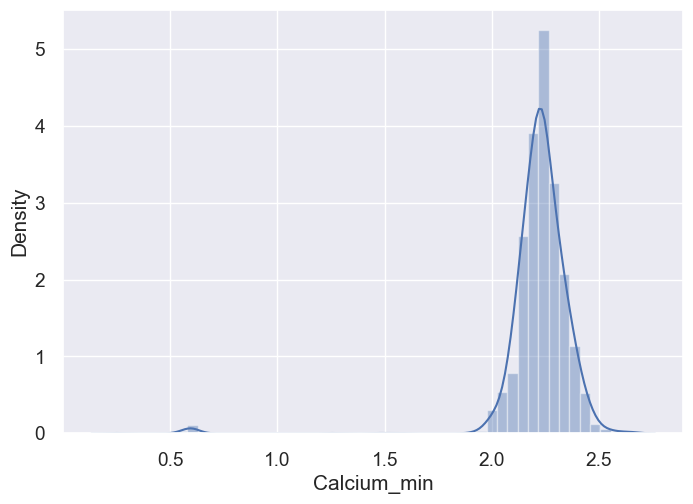

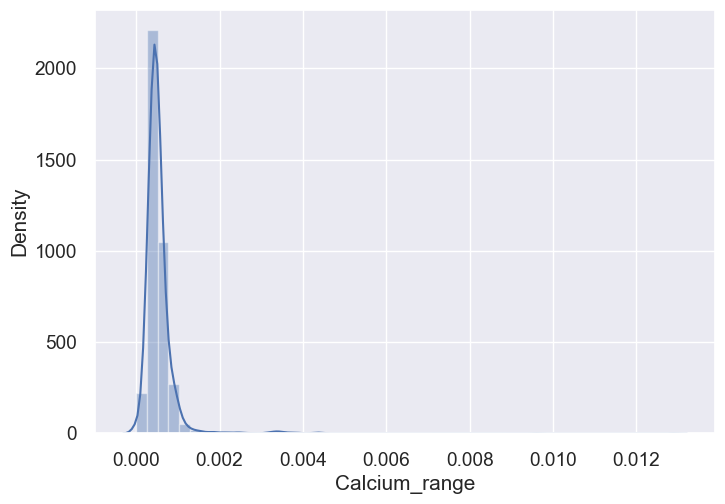

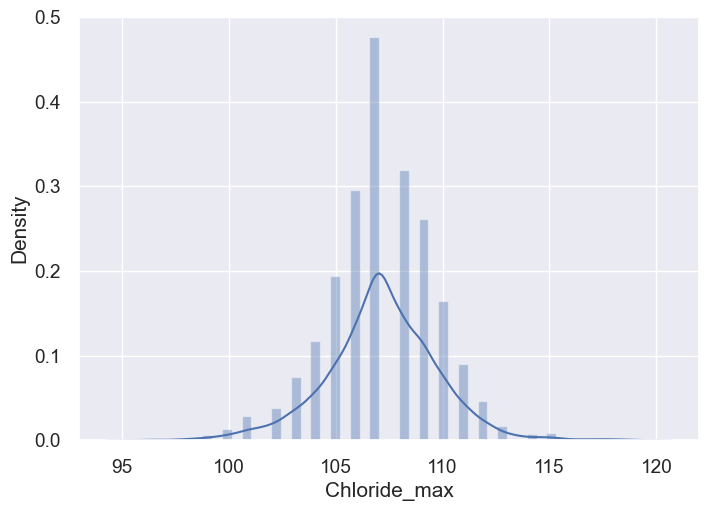

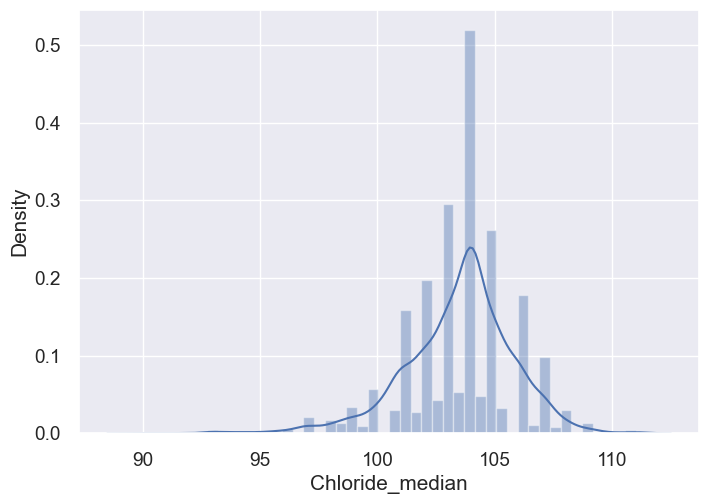

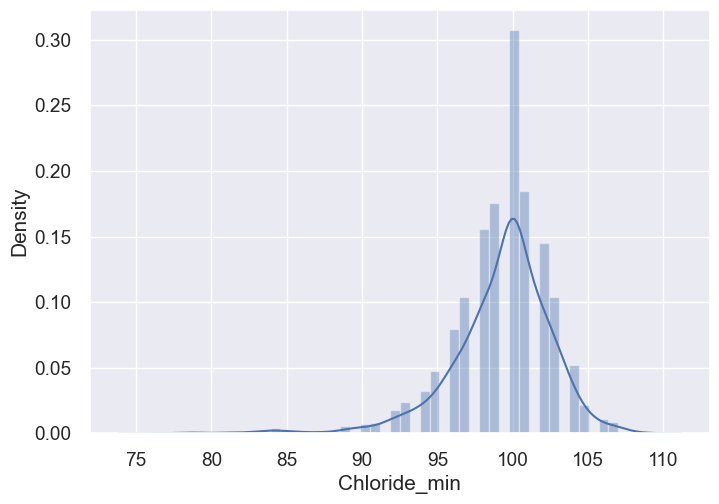

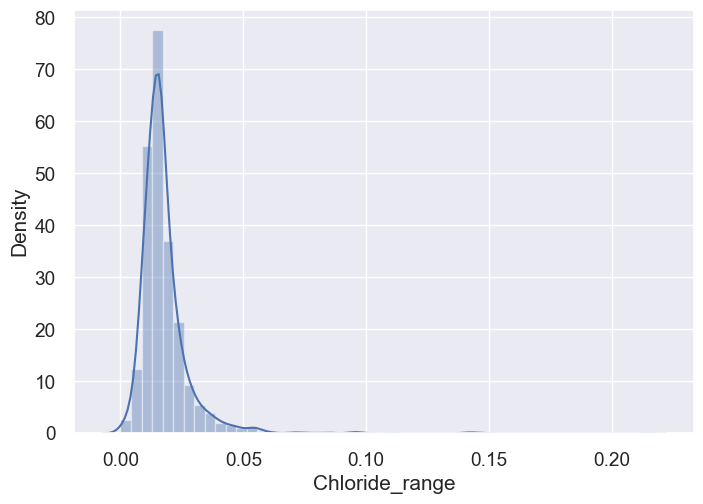

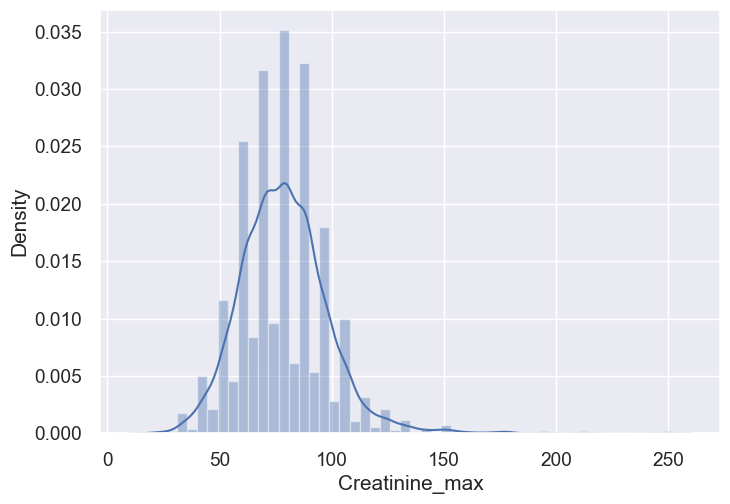

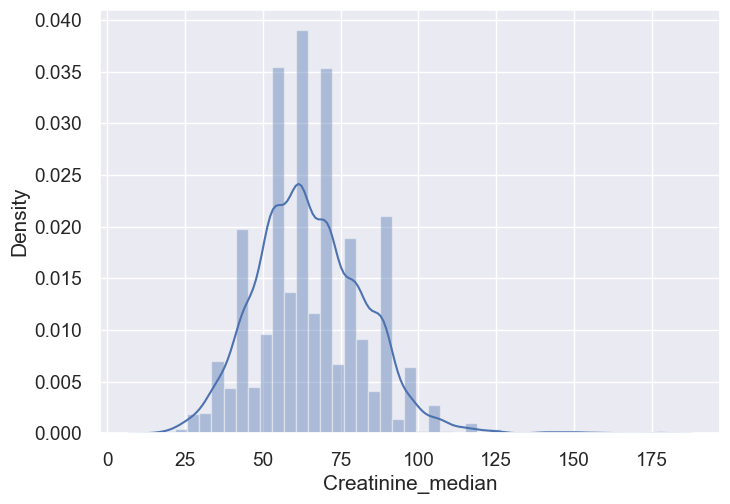

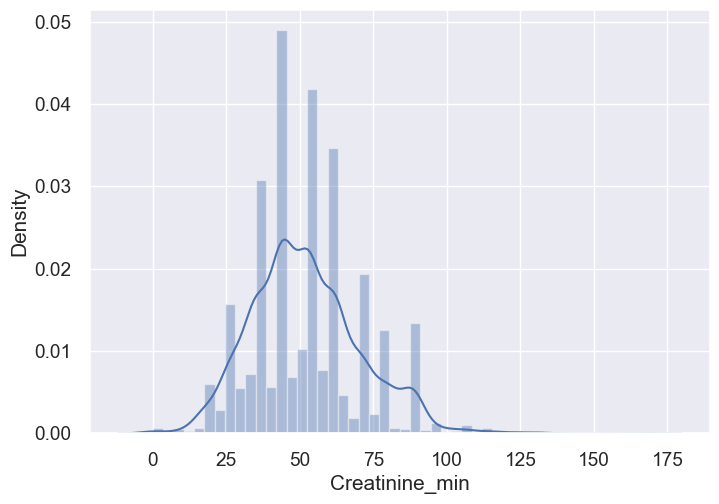

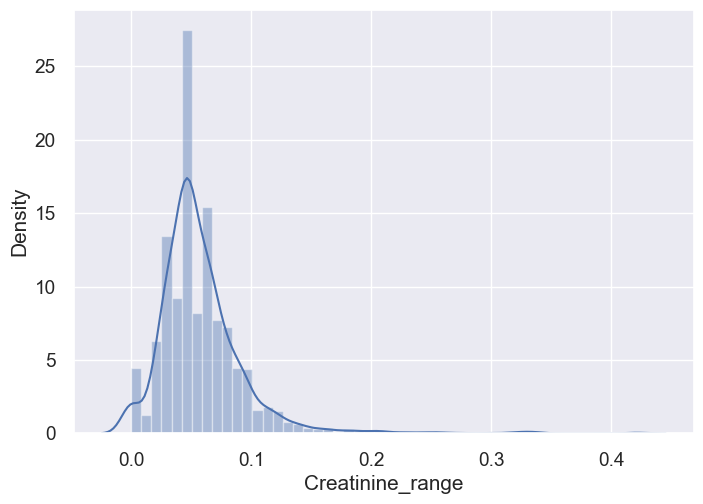

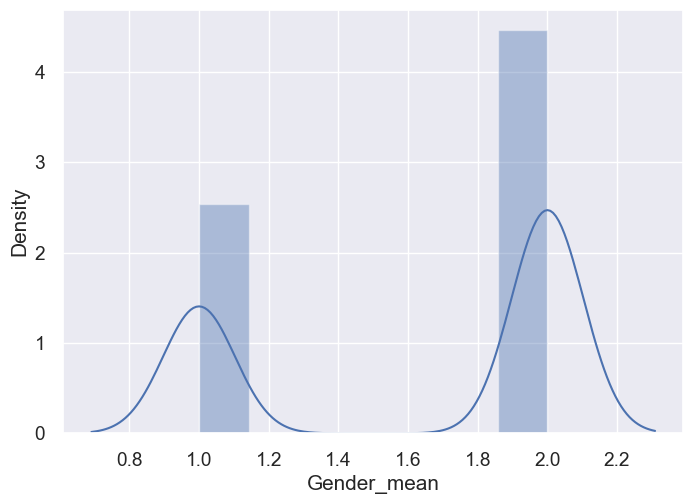

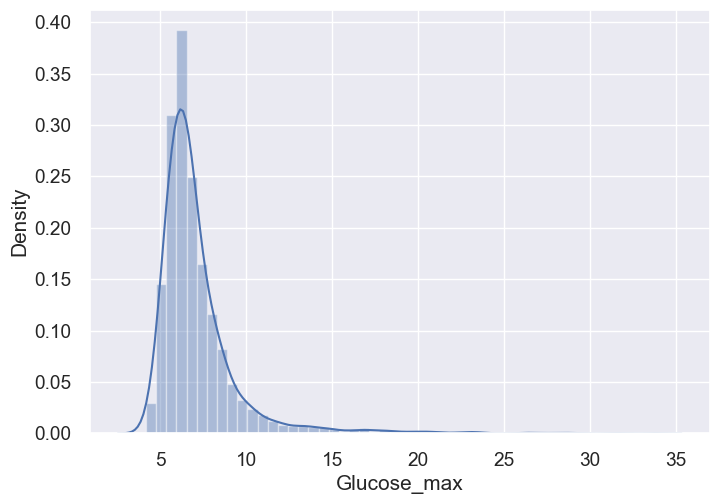

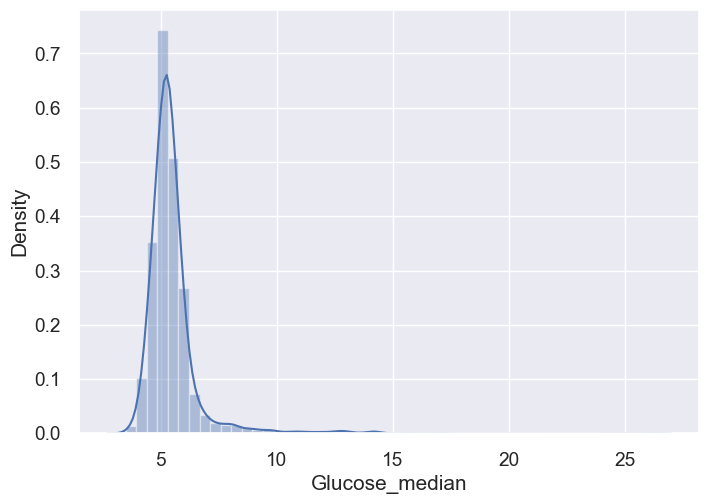

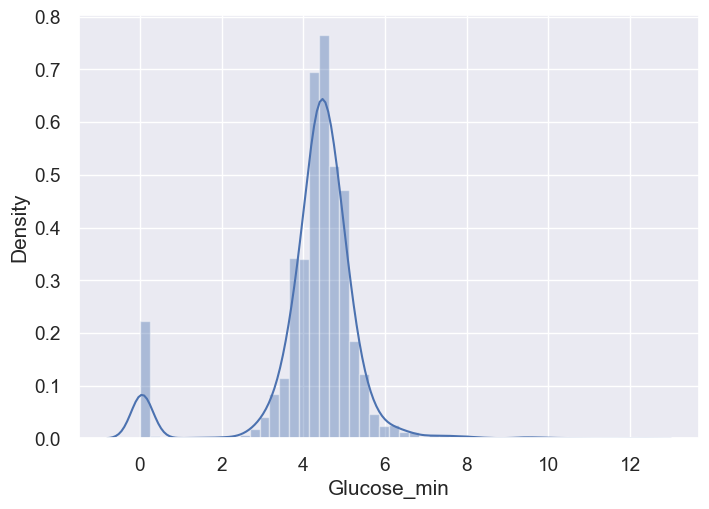

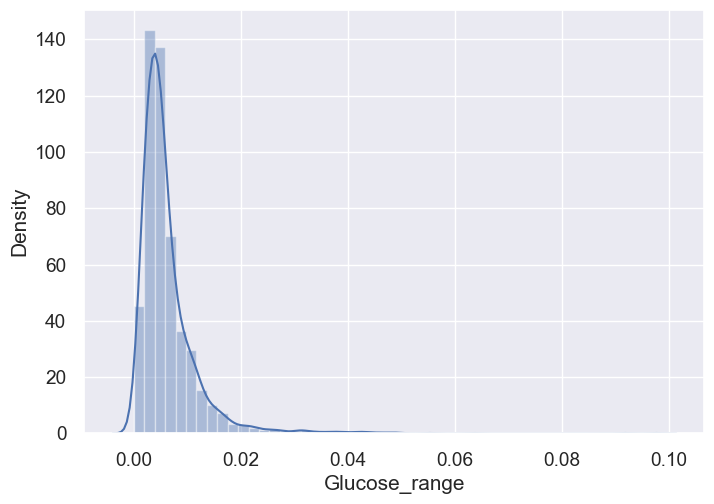

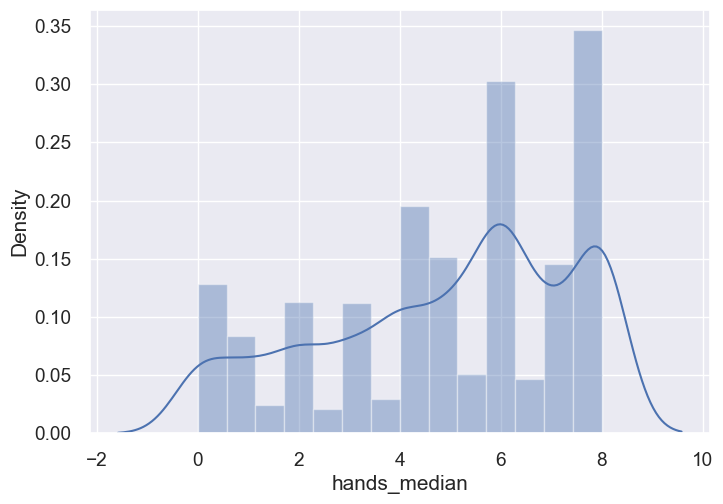

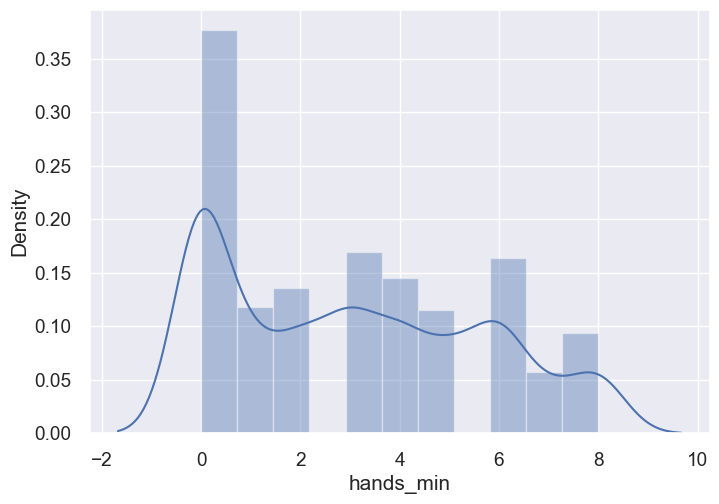

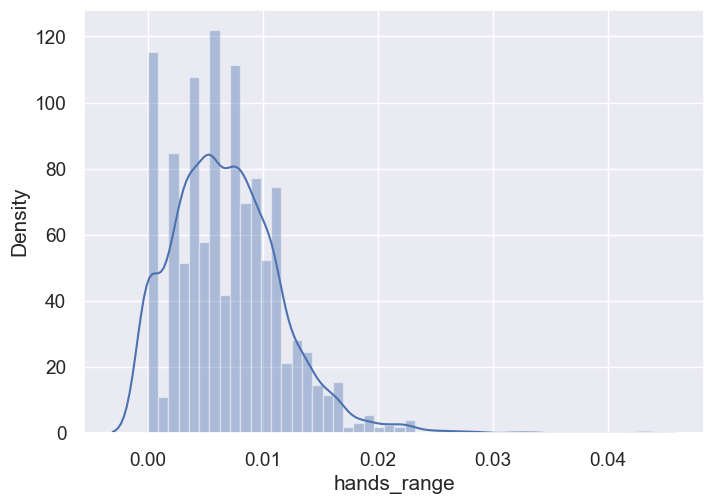

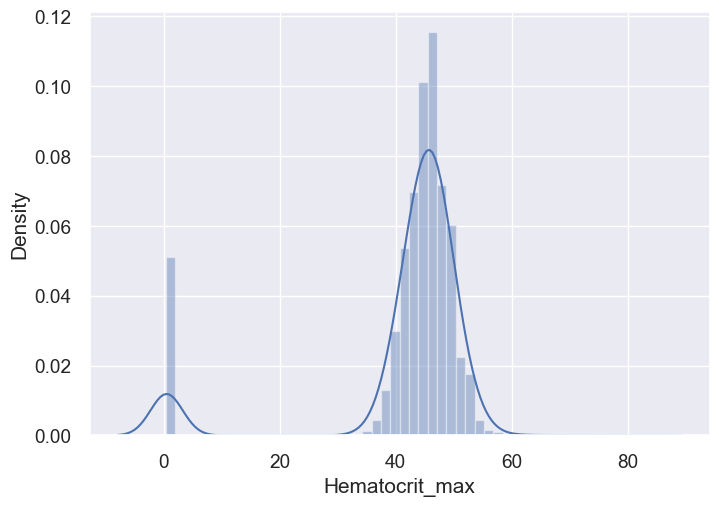

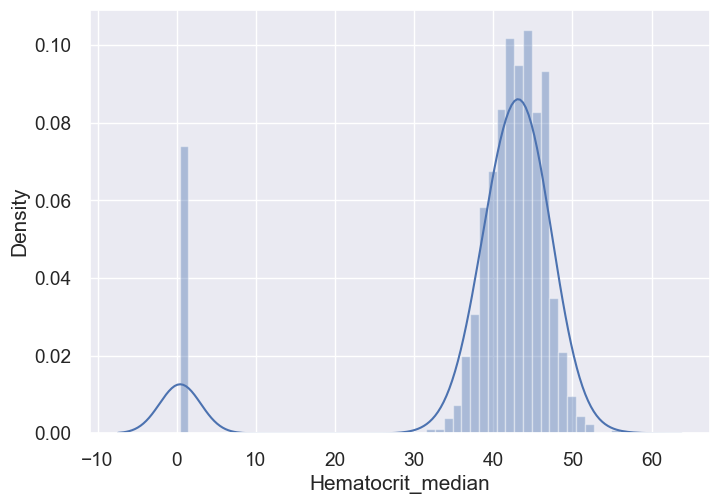

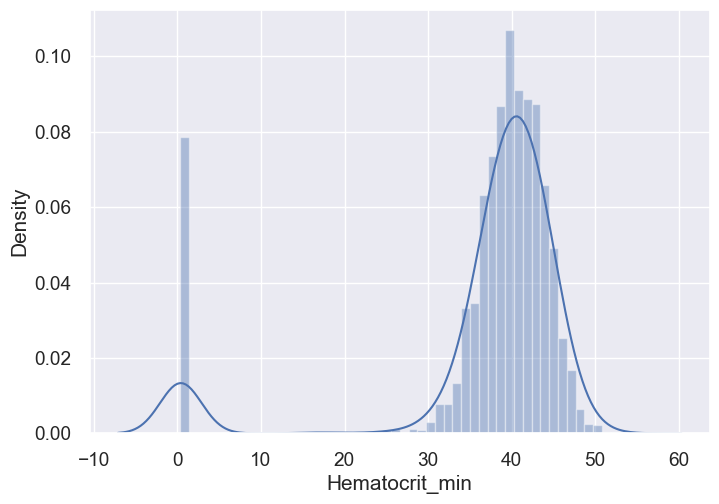

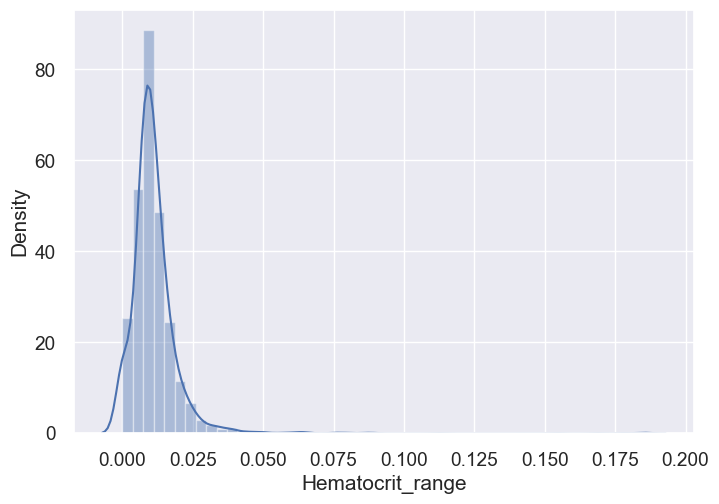

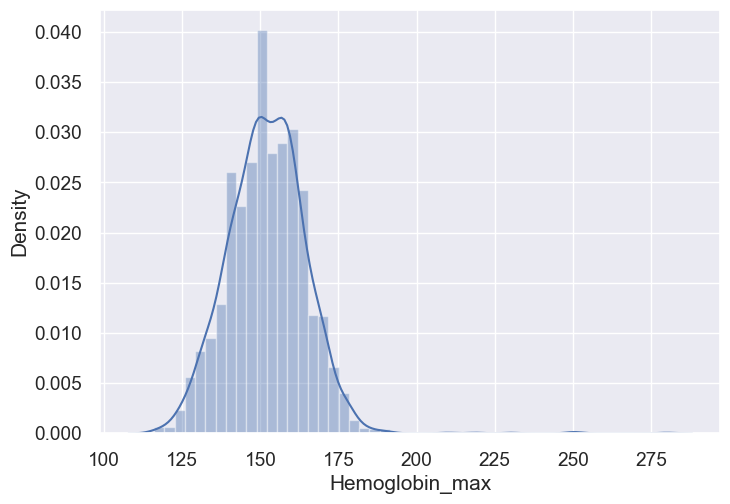

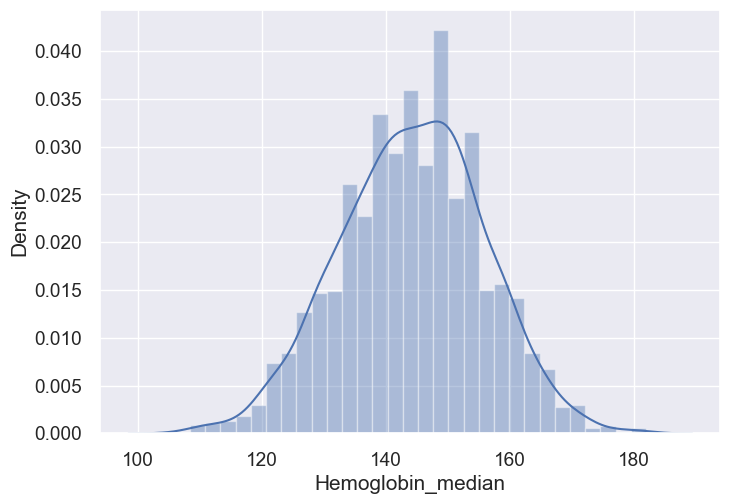

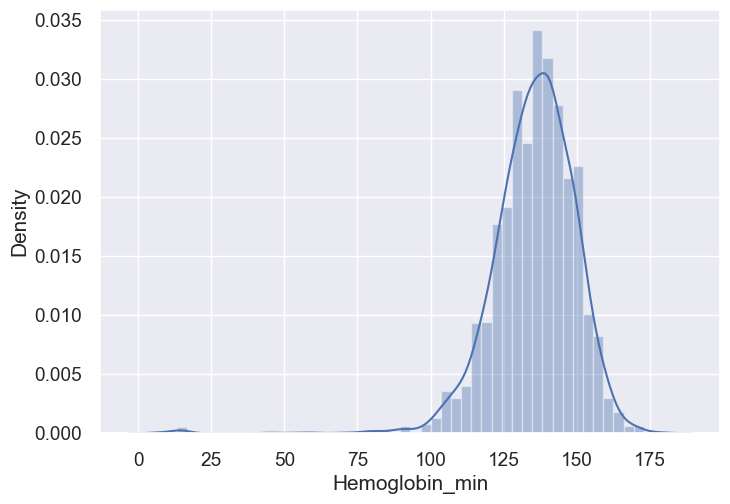

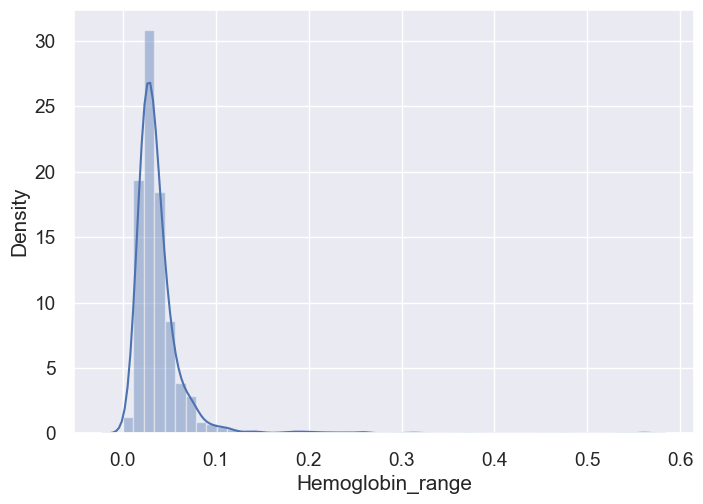

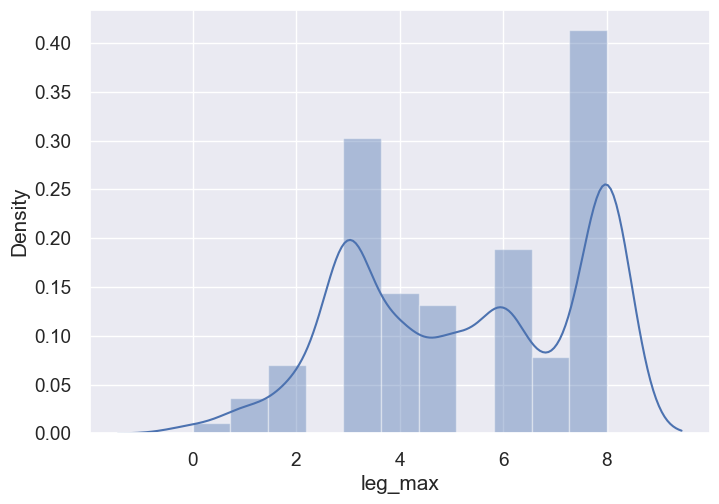

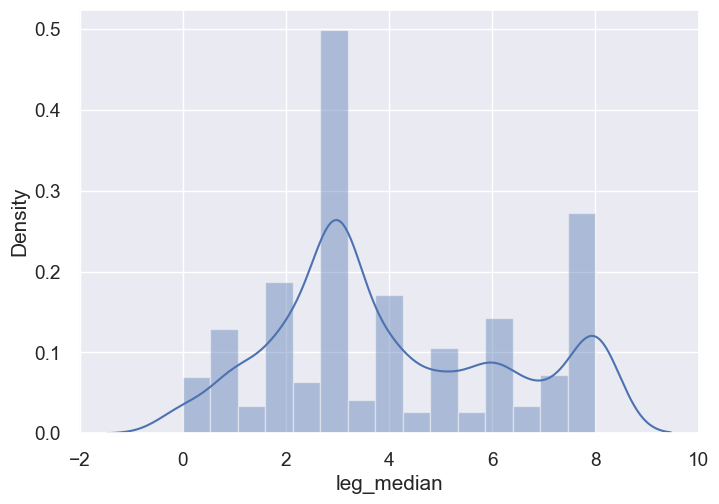

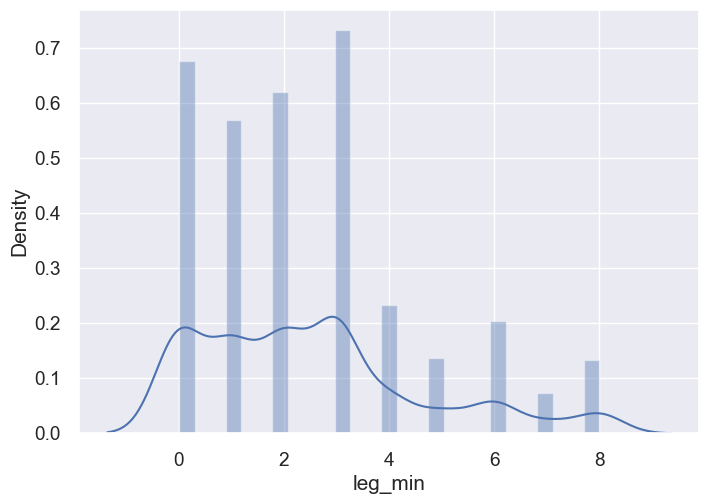

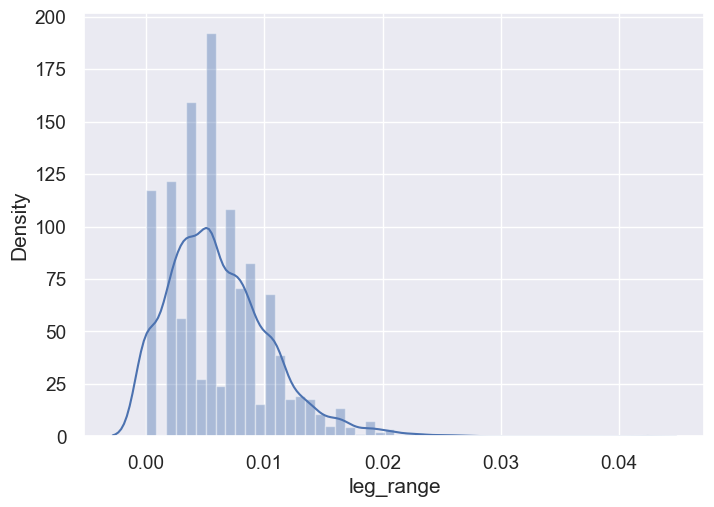

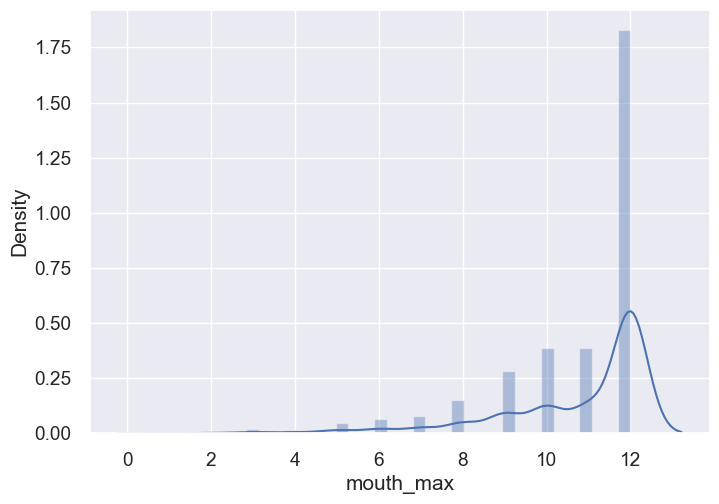

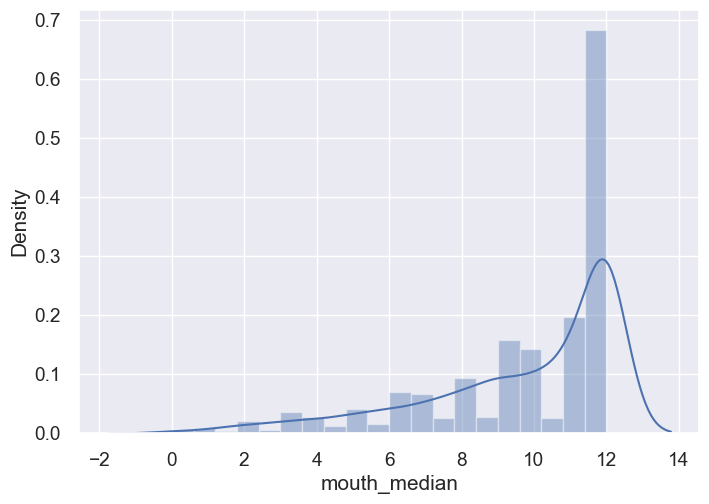

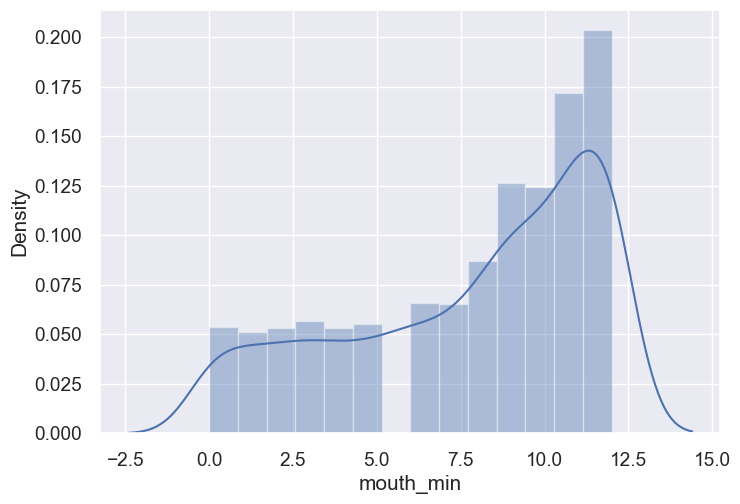

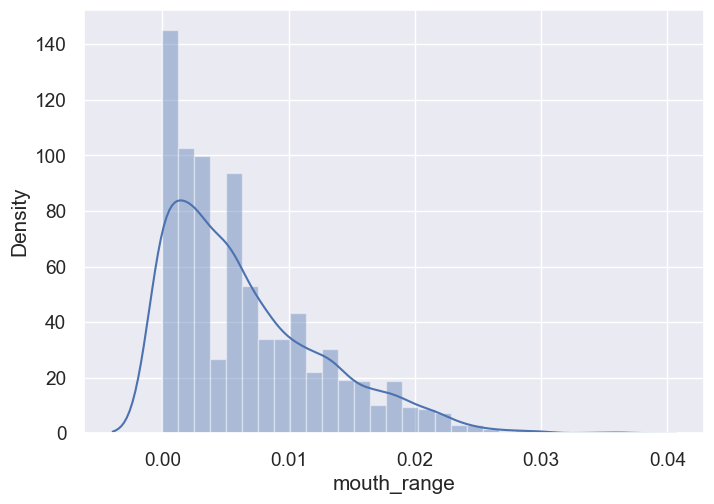

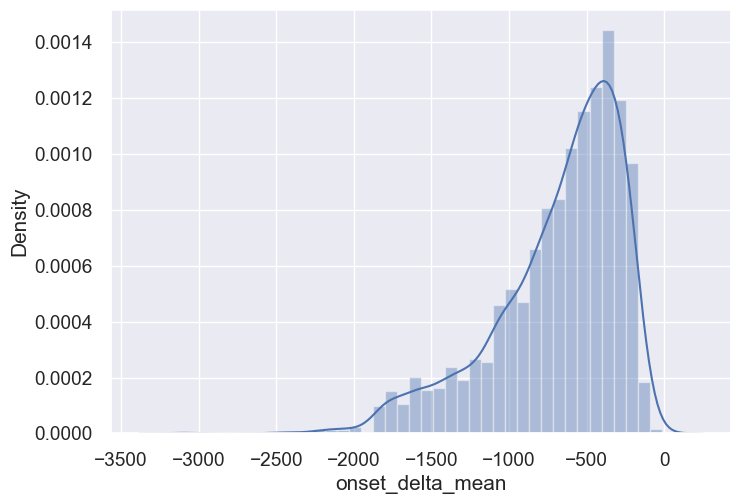

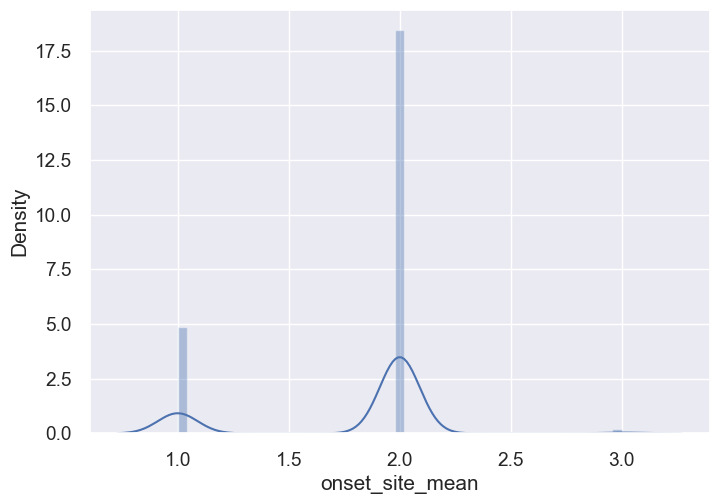

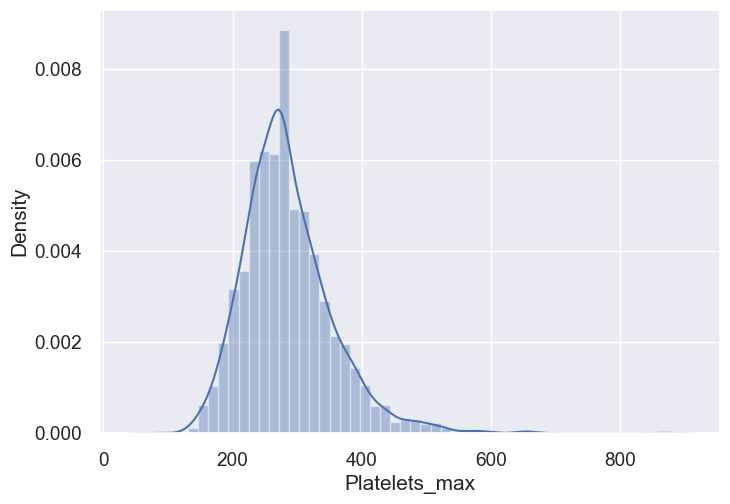

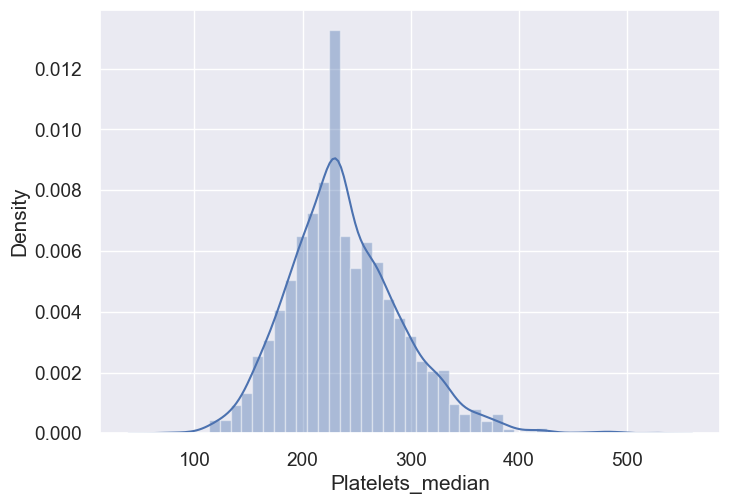

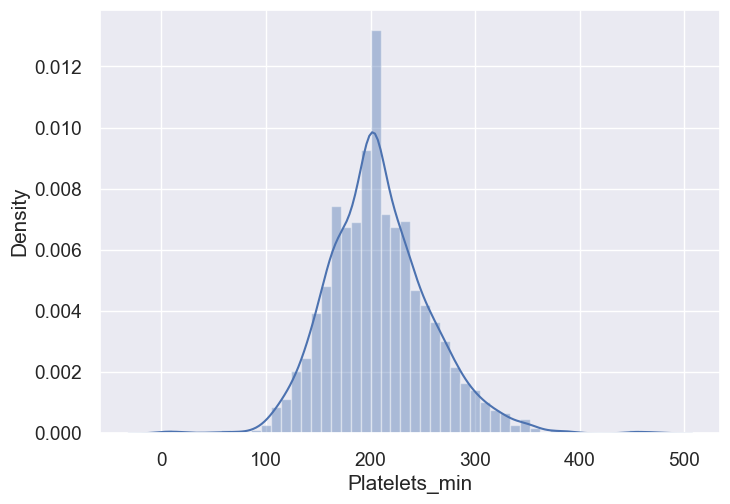

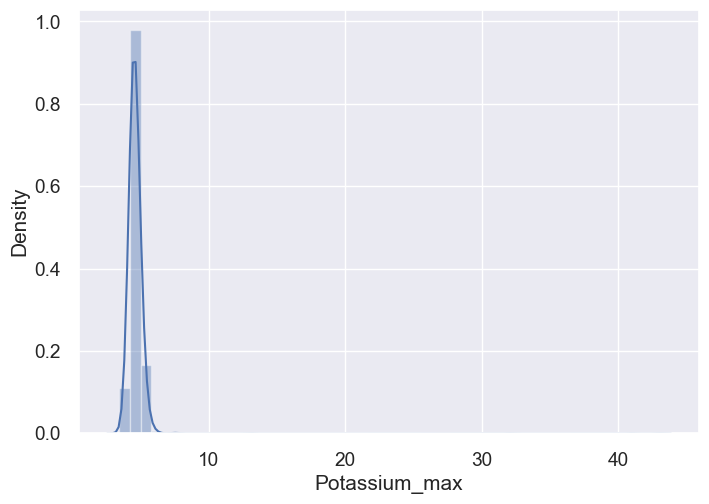

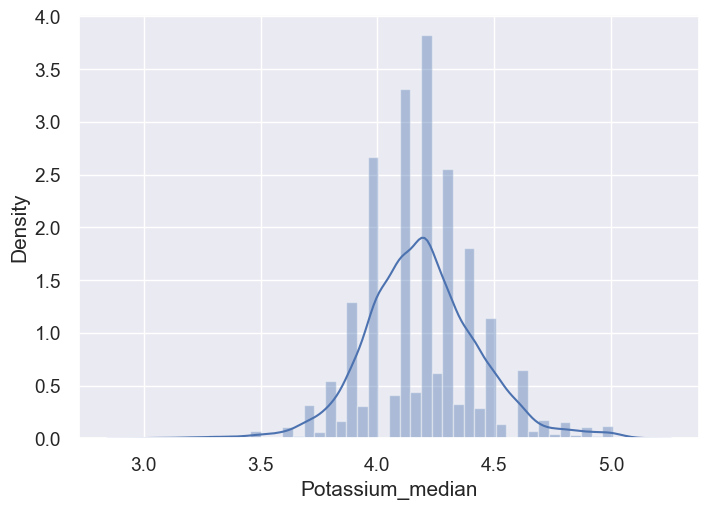

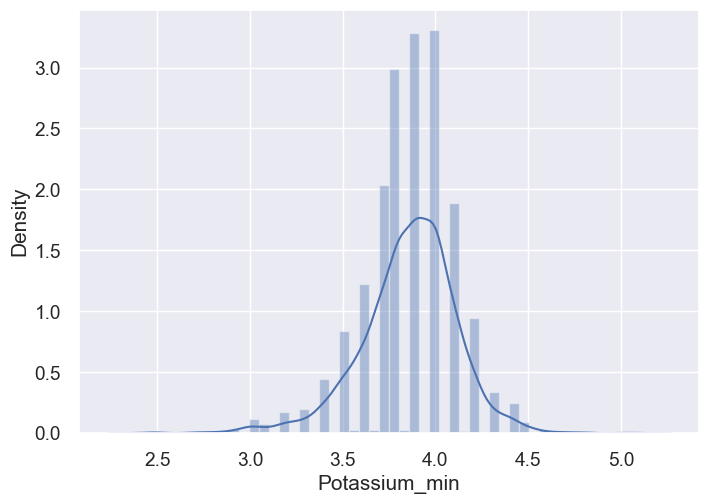

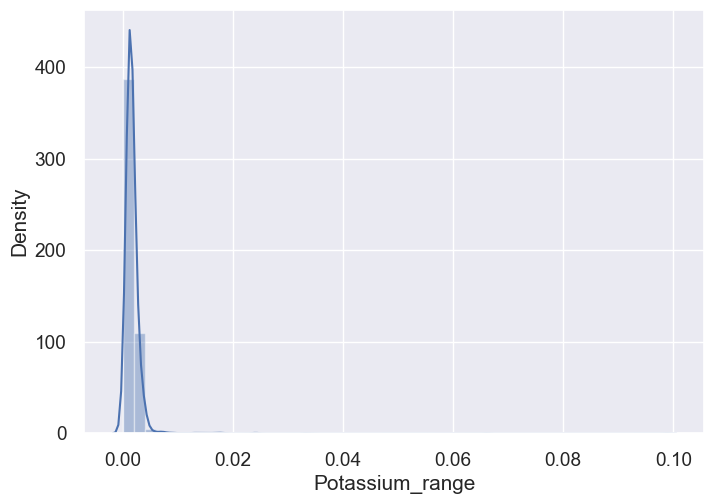

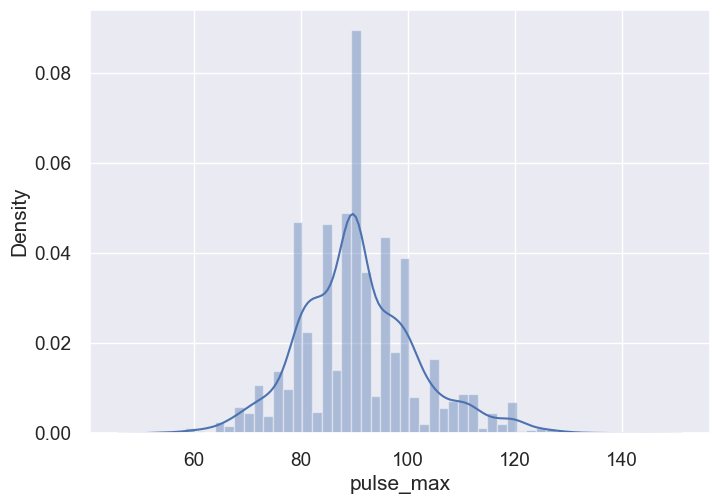

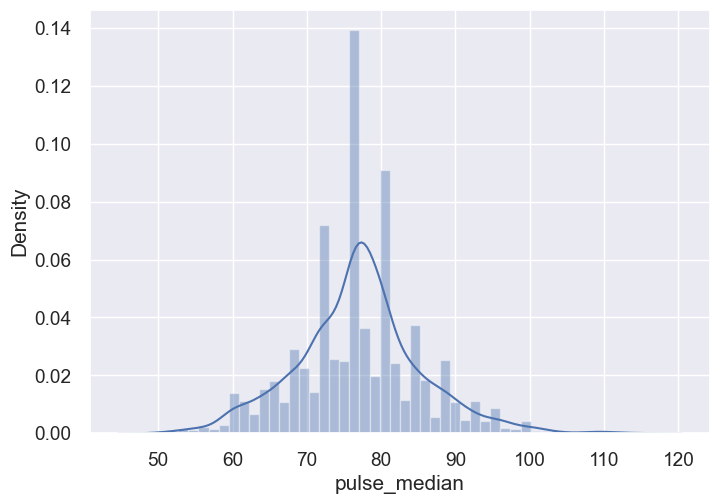

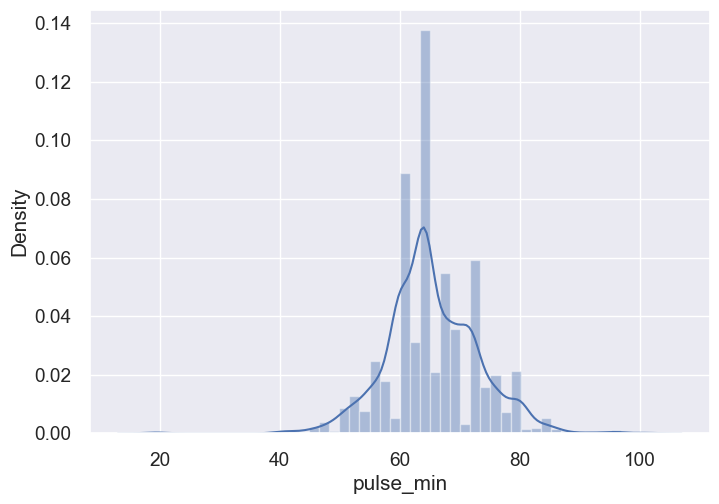

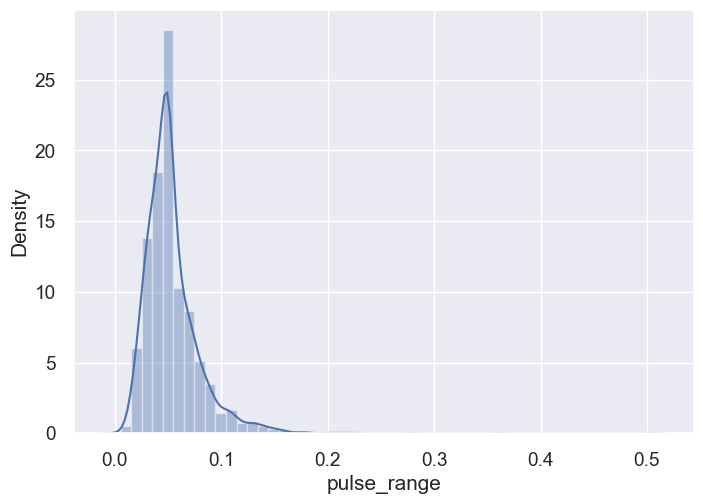

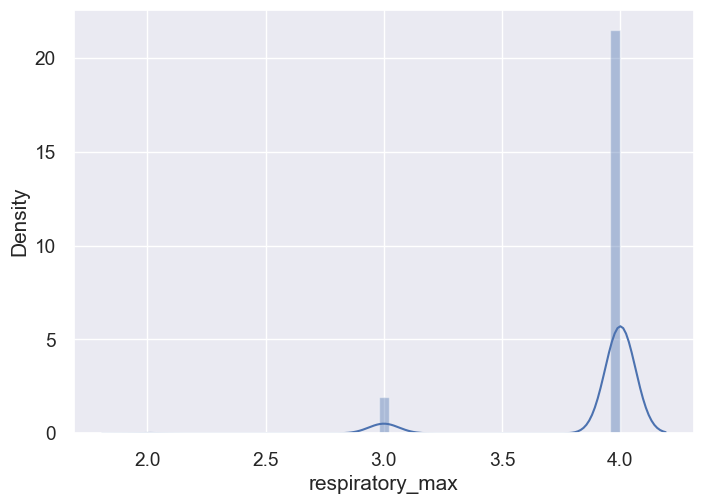

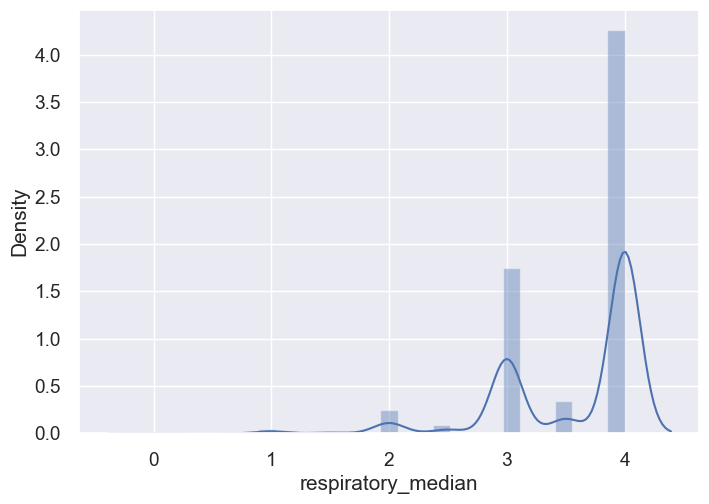

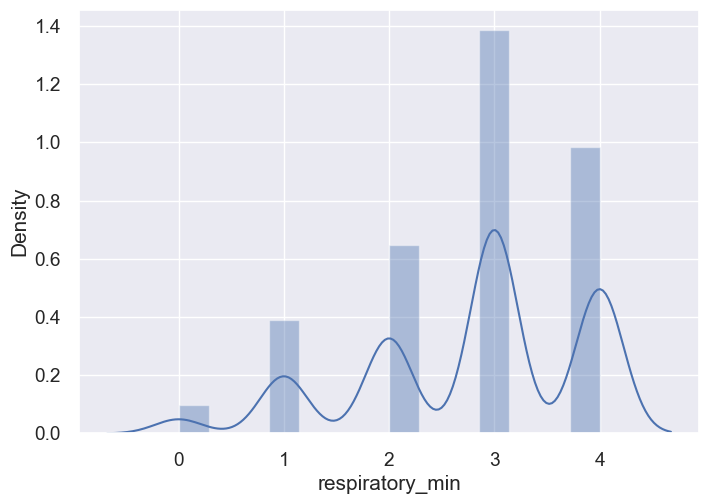

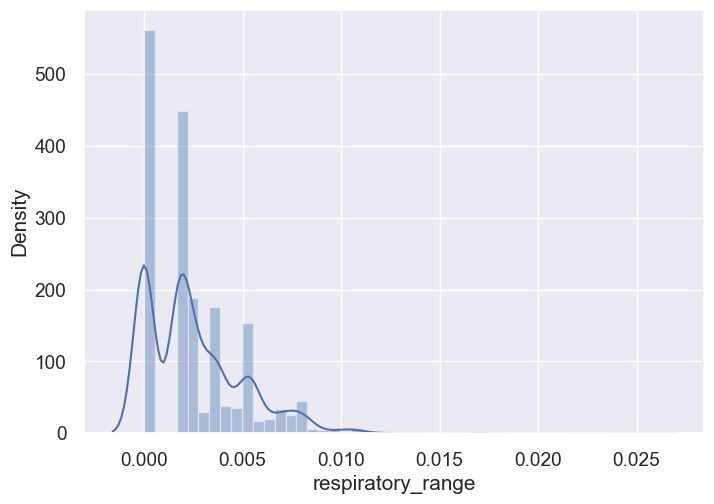

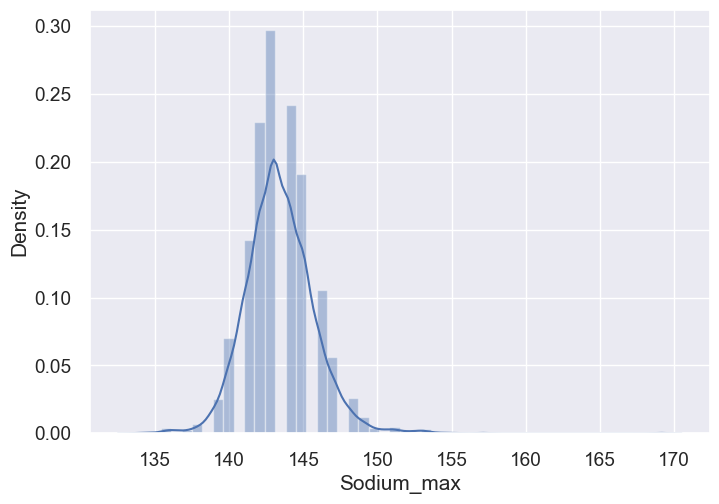

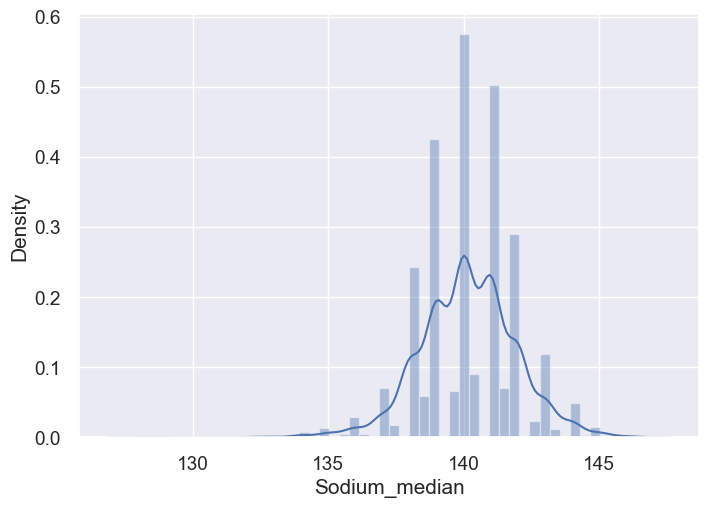

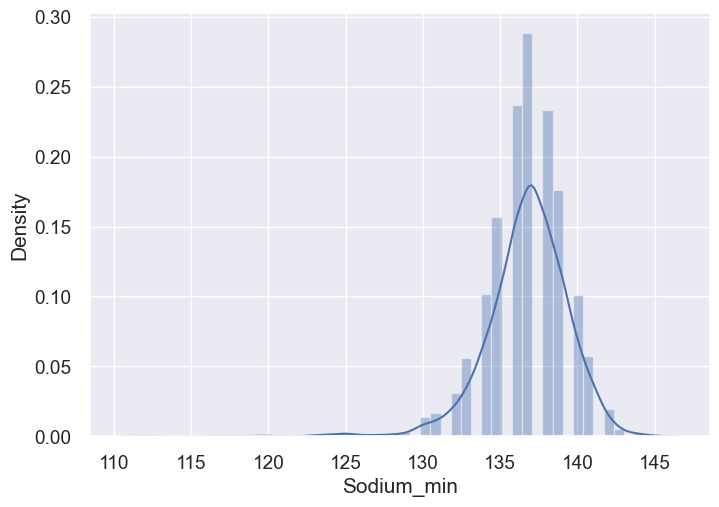

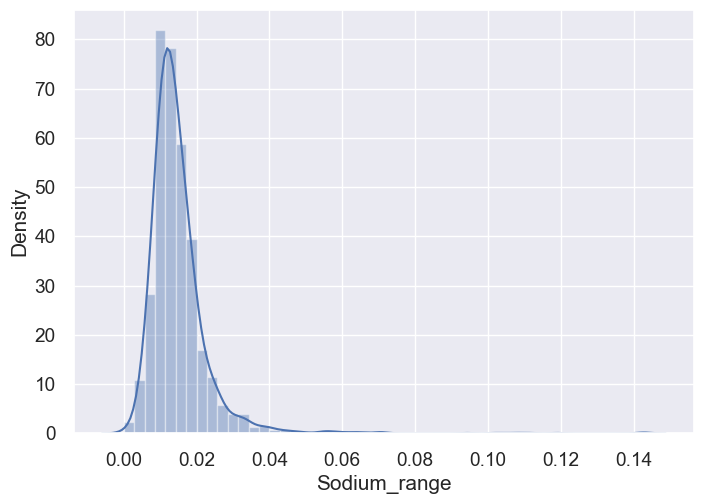

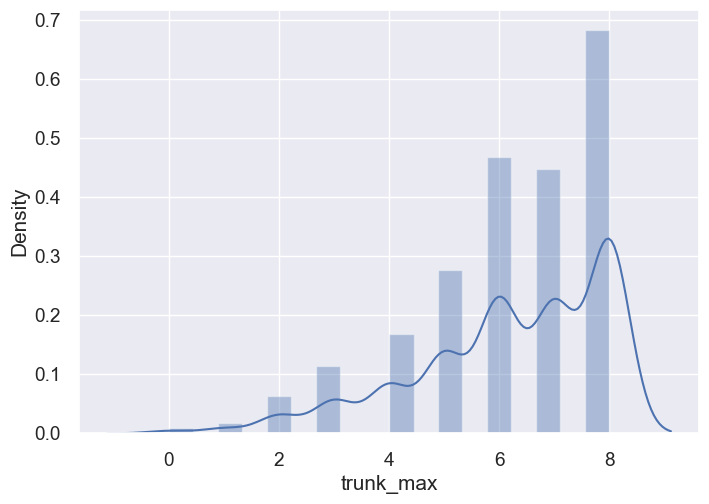

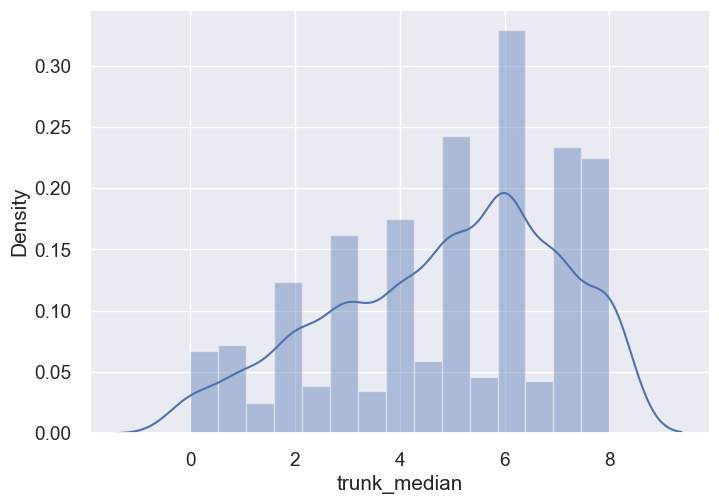

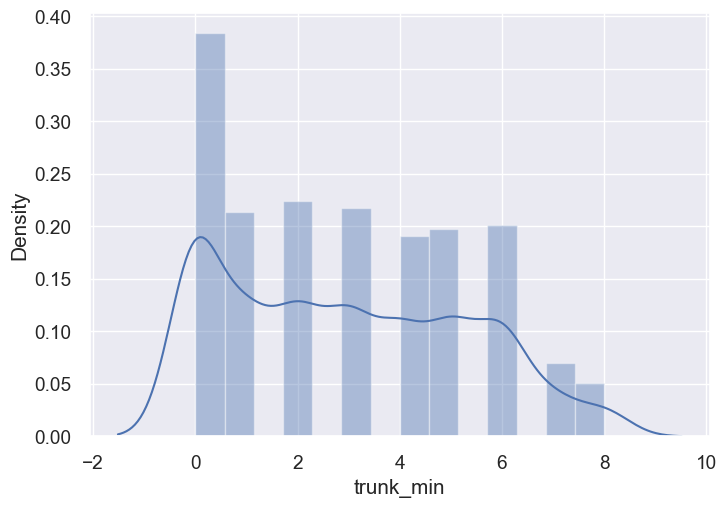

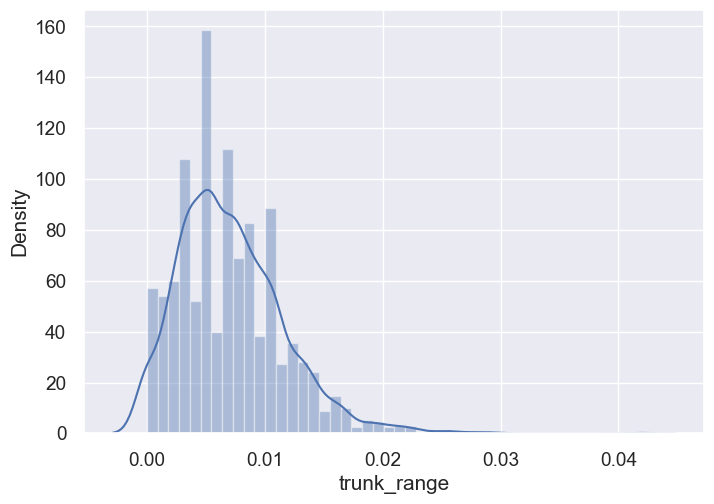

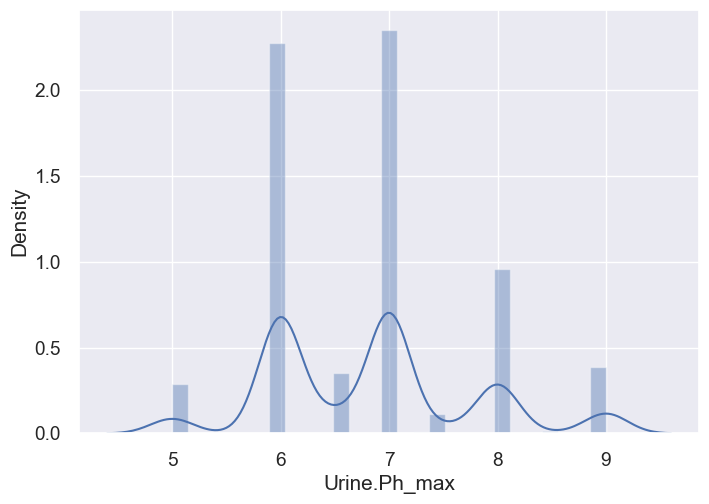

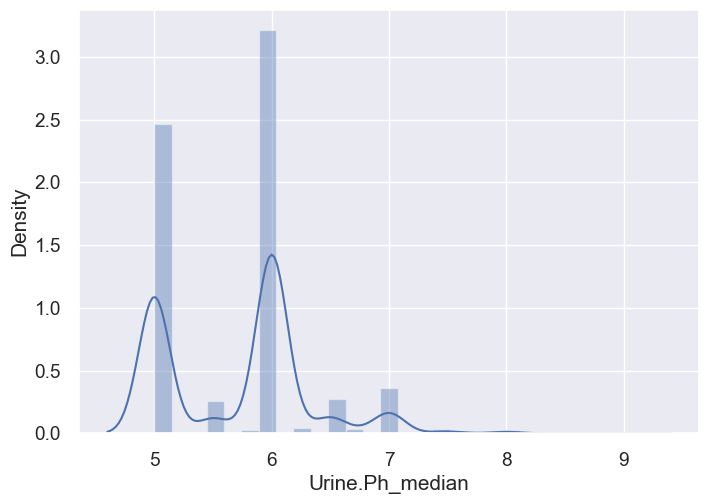

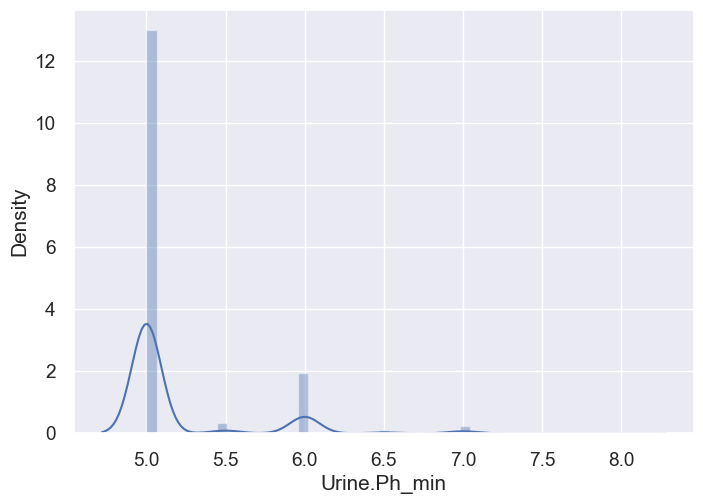

In [ ]:
# Creating a histogram to view the distribution of the continuous variables.
# Plotting the histograms of numeric variables.
df1 = df.select_dtypes([np.int, np.float])
for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.distplot(df1[col])

Age is mostly normally distributed but it is a little skewed toward the upper range of age, which makes sense with an ALS diagnosis.  Most of the rest of the data is pretty normally distributed but with tails stretching long into the upper range of the data.  Many of the variables are leptokurtic with most of the data highly concentrated to a small range.  Blood pressure readings appear to spike two or three times in clusters (bimodal or trimodal?).  Hematocrit appears to have a small spike near zero and not much data til the data becomes much more normally distributed.   The body assessments (hands, feet, etc) have an unique distribution due to the range of possiblities (I'm guessing between 0 and 8/10?).  After looking at the data and how each value contains a min, max, range and median, I'm inclined to keep just the median of each value because each median will be highly correlated with the min/max and range.   I chose the median because it's generally a good value of central tendency when there are outliers and the mean score isn't available.  I will however use the min score for ALSFRS as this is likely the furthest progression of the disease and the median combined with slope would have to tell the same story.  The score ranges from 48 (no sign of physical issues to 0 which is severe physical decline).  

In [ ]:
# Dropping all data that is a min/max/range as this is highly correlated with median and each other
# (max-min equals range).
# Liver and kidney functions can be affected by ALS so I'm leaving those in.
# The progression/severity of the disease is noted with an MRI and muscular measurements of hands,
# feet, trunk etc so I'm leaving those in.  While literature says blood tests can help diagnose, there
# isn't a lot of literature that helps to figure out which of these readings from blood tests are important
# Given that creatinine levels are known to assess muscular function, I'm leaving those in.
# Renaming ALSFRS_Total_min so it isn't deleted.
df = df.rename(columns={"ALSFRS_Total_min": "ALSFRS"})
# Deleting irrelevant variables
df = df.loc[:, ~df.columns.str.endswith('slope')]
df = df.loc[:, ~df.columns.str.endswith('min')]
df = df.loc[:, ~df.columns.str.endswith('max')]
df = df.loc[:, ~df.columns.str.endswith('range')]
df = df.loc[:, ~df.columns.str.startswith('bp')]
df = df.loc[:, ~df.columns.str.startswith('glucose')]
df = df.loc[:, ~df.columns.str.startswith('Hem')]
df = df.loc[:, ~df.columns.str.startswith('Sodium')]
df = df.loc[:, ~df.columns.str.startswith('Albumin')]
df = df.loc[:, ~df.columns.str.startswith('Calcium')]
df = df.loc[:, ~df.columns.str.startswith('Chlor')]
df = df.loc[:, ~df.columns.str.startswith('Platelet')]
df = df.loc[:, ~df.columns.str.startswith('Urine')]
df = df.loc[:, ~df.columns.str.startswith('Bicarb')]
df = df.loc[:, ~df.columns.str.startswith('Blood')]
df = df.loc[:, ~df.columns.str.endswith('Total_median')]
df.head()

Age_mean  ALSFRS  ALT.SGPT._median  AST.SGOT._median  Creatinine_median  \
0        65      22              22.0              27.5              79.56   
1        48      21              13.0              17.0              53.04   
2        38      10              20.0              19.0              79.56   
3        63      24              60.0              40.0              61.88   
4        63      20              26.5              26.5              48.62   

   Gender_mean  Glucose_median  hands_median  leg_median  mouth_median  \
0            1          4.4955           7.5         6.5           3.5   
1            1          4.9950           6.0         7.5           8.0   
2            2          5.1060           1.0         3.0           7.0   
3            2          4.7730           5.5         3.5          12.0   
4            1          5.7165           6.5         2.0          12.0   

   onset_delta_mean  onset_site_mean  Potassium_median  pulse_median  \
0             -1023                1              4.25          68.0   
1              -341                1              4.30          76.0   
2             -1181                1              4.00          73.0   
3              -365                2              4.20          72.0   
4             -1768                2              3.75          96.0   

   respiratory_median  trunk_median  
0                 3.0           7.0  
1                 4.0           7.0  
2                 4.0           0.0  
3                 3.0           5.0  
4                 4.0           4.0

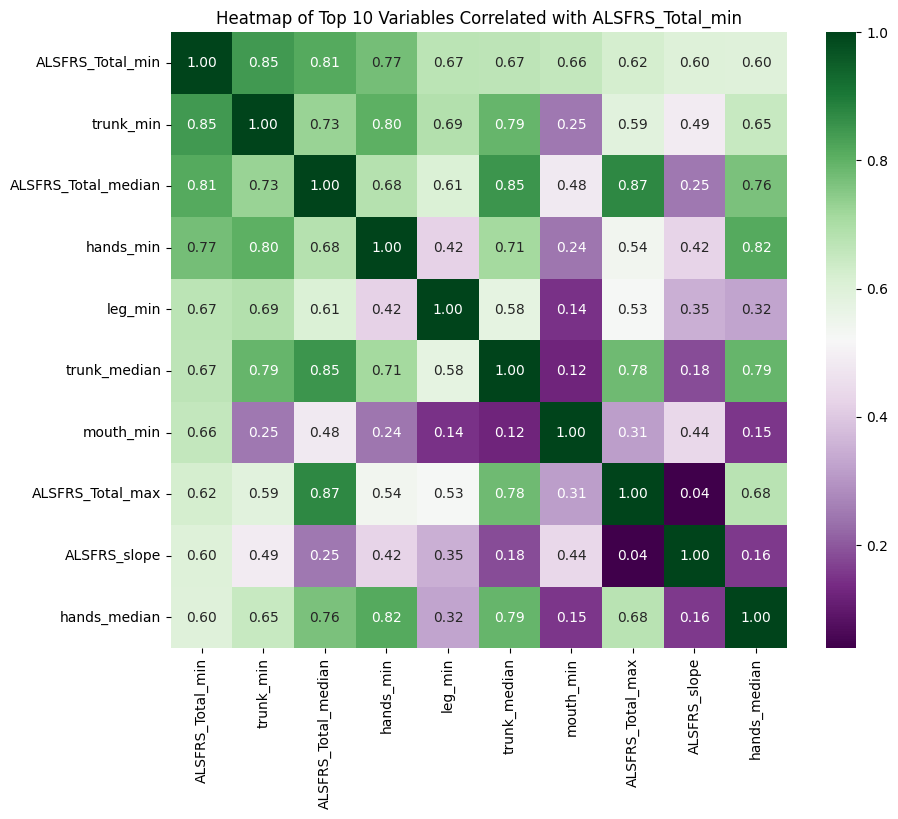

In [17]:
# Creating a correlation matrix of the top 10 variables correlated with ALSFRS functioning.
correlation_matrix = df.corr()
target_variable = 'ALSFRS_Total_min'
top_10_correlated = correlation_matrix.nlargest(10, target_variable)[target_variable].index
top_10_correlation_matrix = correlation_matrix.loc[top_10_correlated, top_10_correlated]
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_correlation_matrix, annot=True, cmap='PRGn', fmt=".2f", square=True)
plt.title('Heatmap of Top 10 Variables Correlated with {}'.format(target_variable))
plt.show()

Initial look at the data shows that the body measurements appear to measure the severity of ALS symptoms but that they are also correlated to themselves.

## Cluster (K-Means) Analyses to Group ALS patients by Type of Symptoms

Running a cluster analyses to group the ALS patients by their symptoms.  Generally this is done to chart the progression of the disease and what symptoms are most likely seen as the progress, but in some cases it is done to see different types of the disease, promptly different therapies and medicines to counteract it.  Knowing the type of a disease or the progression can vastly affect how we learn about the disease as well as how to treat it.

In [ ]:
# None of the variables are categorical so I don't need to split and create
# variables for the non-numeric data.
# Standardizing the features to reduce skew and outliers
# Defining Scaler
sc = StandardScaler()
# Scaling data
scaled_data = sc.fit_transform(df)

In [ ]:
# Running an exploratory cluster analyses to see the best number of clusters (Checking up to 10 clusters).
from sklearn.cluster import KMeans
wcss = []
clusters = []
# Running cluster analyses for 1 cluster through fitting 10 clusters
for i in range (1,11):
    # Training clustering with the specified K
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    # Fitting the data to the model with the specified K
    kmeans.fit(scaled_data)
    #Appending the WCSS data to a list to map
    wcss.append(kmeans.inertia_)
    # Appending model to cluster list
    clusters.append(kmeans)

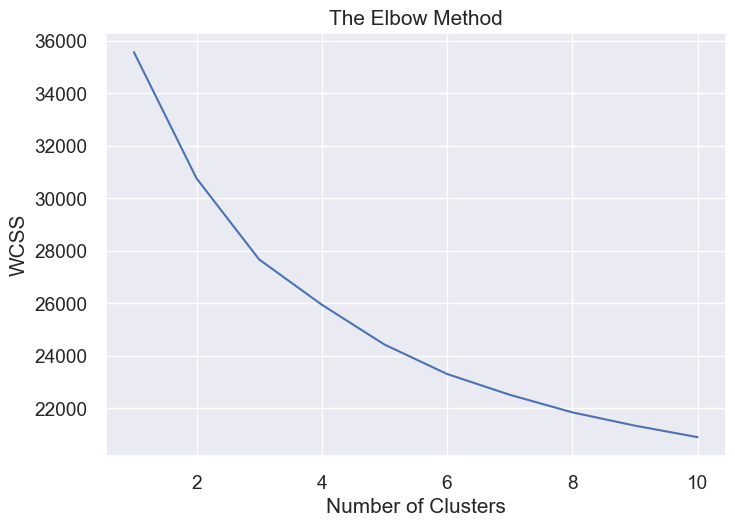

In [ ]:
# Plotting an elbow curve versus the number of clusters to decide the number of clusters desired.
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

While the data doesn't approach and turn as neatly towards the smaller range of the WCSS error range, I can see a small "elbow" at the second and third cluster setting.

## Silhouette score plot

The silhouette score takes into account the cohesiveness (average of the Euclidean distance between each point = a) of each cluster as well as the separation (minimum average distance of centroid to all other points to points in each other cluster = b) between each cluster.  It is the separation subtracted by cohesiveness divided by the maximum of both.  Silhouette scores range from -1 to 1 with the ideal clustering scenario as close to 1 as possible.  A negative score denotes that the separation between the clusters is larger than the cohesiveness of the cluster.   The clusters are unlikely to be mutually exclusive (thus well defined) in this scenario.  In conjunction with the elbow method, the silhouette scores can help validate the elbow method's choice.

In [ ]:
from sklearn.metrics import silhouette_score
for i in range(1,10,1):
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(scaled_data, clusters[i].predict(scaled_data)))

---------------------------------------
KMeans(n_clusters=2, random_state=0)
Silhouette score: 0.13102619079127573
---------------------------------------
KMeans(n_clusters=3, random_state=0)
Silhouette score: 0.14183357457727655
---------------------------------------
KMeans(n_clusters=4, random_state=0)
Silhouette score: 0.1231400142223586
---------------------------------------
KMeans(n_clusters=5, random_state=0)
Silhouette score: 0.12144076152662259
---------------------------------------
KMeans(n_clusters=6, random_state=0)
Silhouette score: 0.12559729075884238
---------------------------------------
KMeans(n_clusters=7, random_state=0)
Silhouette score: 0.11557581507899818
---------------------------------------
KMeans(random_state=0)
Silhouette score: 0.10768839103698488
---------------------------------------
KMeans(n_clusters=9, random_state=0)
Silhouette score: 0.10793122073854516
---------------------------------------
KMeans(n_clusters=10, random_state=0)
Silhouette score:

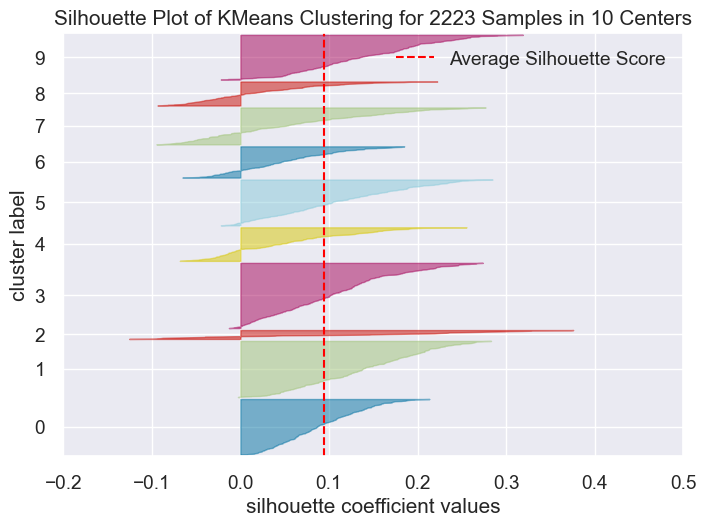

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2223 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Generating a silhouette plot for each cluster.
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
# Fitting the data to the visualizer
visualizer.fit(scaled_data)
# Creating the graph
visualizer.show()

This silhouette score graph shows that the silhouettes are neither long (higher silhouette score) or uniform (homogenous).  The average silhouette score (the red line) is also not optimal as it's very low and near zero.  The width of the second cluster as well as the highest silhouette score show that the best cluster choice is 2 or 3.

In [ ]:
# Running a PCA analyses on the scaled data reduced to TWO features.
from sklearn.decomposition import PCA
# Performing a PCA on the scaled data
pca = PCA(n_components = 2, whiten=True)
features_pca = pca.fit_transform(scaled_data)
print('Original number of features:',  scaled_data.shape[1])
print('Reduced number of features:', features_pca.shape[1])

Original number of features: 16
Reduced number of features: 2


## Two cluster model

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

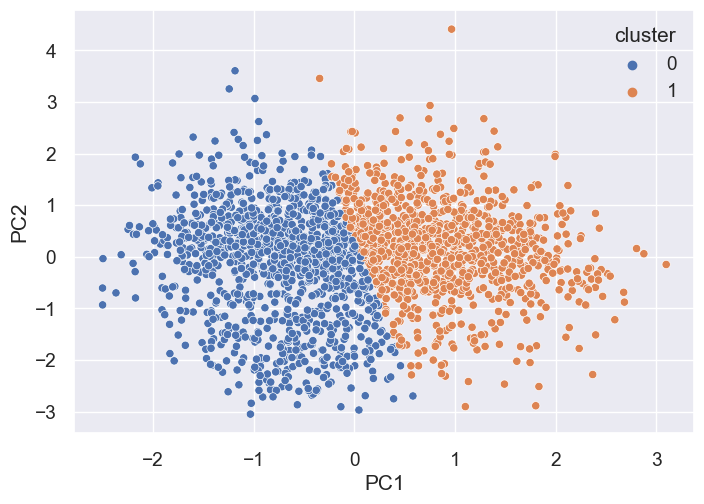

In [ ]:
# Saving clustering results to a dataframe for a two cluster model
pca_data2 = pd.DataFrame(features_pca, columns=['PC1','PC2'])
#Perform kmeans on the PCA transformed data
kmeans =KMeans(n_clusters=2).fit(features_pca)
pca_data['cluster'] = pd.Categorical(kmeans.labels_)
# Plotting the PCA scores by cluster
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

PC1 seems to be the strong deciding factor on whether a person is assigned to cluster 0 or cluster 1.  Cluster 1 is almost entirely comprised of persons higher higher on PC1 (above zero).  Consequently persons lower on PC1(namely below zero) are all in cluster 0.  PC2 seems to have less effort on the clustering, mostly that those varying on PC2 more (higher or lower ranges) tend to be in cluster 0, while cluster 1 tends to have more central PC2 readings although there is a decline in this pattern as PC1 gets higher.

In [ ]:
# Assigning each cluster to each respondent to assess what the makeup of each
# cluster is.
df.loc[:,"cluster"] = kmeans.labels_

#### Cluster 0 descriptives

In [ ]:
# Splitting data into just cluster 1 for analysis.
cluster_0 = df[(df.cluster == 0)]
cluster_0.describe()

Age_mean       ALSFRS  ALT.SGPT._median  AST.SGOT._median  \
count  1199.000000  1199.000000       1199.000000       1199.000000   
mean     55.994162    25.093411         33.268140         30.160967   
std      11.122064     6.876051         15.070343          9.405555   
min      18.000000     2.000000          8.000000          9.000000   
25%      49.000000    21.000000         22.500000         23.500000   
50%      57.000000    26.000000         30.000000         28.000000   
75%      64.000000    30.000000         40.000000         35.000000   
max      81.000000    40.000000        121.000000         82.000000   

       Creatinine_median  Gender_mean  Glucose_median  hands_median  \
count        1199.000000  1199.000000     1199.000000   1199.000000   
mean           70.941583     1.673895        5.482762      6.413470   
std            16.436398     0.468982        1.271635      1.511664   
min            26.520000     1.000000        3.745000      1.000000   
25%            61.000000     1.000000        4.900000      6.000000   
50%            70.720000     2.000000        5.300000      6.500000   
75%            80.000000     2.000000        5.700000      8.000000   
max           176.800000     2.000000       26.196000      8.000000   

        leg_median  mouth_median  onset_delta_mean  onset_site_mean  \
count  1199.000000   1199.000000       1199.000000      1199.000000   
mean      5.247289      9.930984       -629.321935         1.717264   
std       2.081785      2.859626        374.182133         0.457868   
min       0.000000      0.000000      -2366.000000         1.000000   
25%       3.000000      9.000000       -827.500000         1.000000   
50%       5.000000     11.000000       -538.000000         2.000000   
75%       7.500000     12.000000       -350.500000         2.000000   
max       8.000000     12.000000        -16.000000         3.000000   

       Potassium_median  pulse_median  respiratory_median  trunk_median  \
count       1199.000000   1199.000000         1199.000000   1199.000000   
mean           4.225121     75.729775            3.738949      6.417848   
std            0.247670      8.297120            0.476747      1.146475   
min            3.300000     50.000000            1.000000      2.000000   
25%            4.100000     72.000000            3.500000      6.000000   
50%            4.200000     76.000000            4.000000      6.000000   
75%            4.400000     80.000000            4.000000      7.000000   
max            5.100000    115.000000            4.000000      8.000000   

       cluster  
count   1199.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

#### Cluster 1 descriptives

In [ ]:
# Splitting data into just cluster 2 for analysis.
cluster_1 = df[(df.cluster == 1)]
cluster_1.describe()

Age_mean       ALSFRS  ALT.SGPT._median  AST.SGOT._median  \
count  1024.000000  1024.000000       1024.000000       1024.000000   
mean     52.859375    13.769531         32.671387         27.807617   
std      11.486562     5.952370         16.203697          9.660948   
min      23.000000     0.000000          8.000000         11.000000   
25%      45.000000     9.000000         22.000000         21.000000   
50%      53.000000    14.000000         29.000000         26.000000   
75%      62.000000    18.000000         39.000000         32.000000   
max      78.000000    29.000000        193.000000        100.000000   

       Creatinine_median  Gender_mean  Glucose_median  hands_median  \
count        1024.000000  1024.000000     1024.000000   1024.000000   
mean           58.463643     1.594727        5.492209      3.139648   
std            15.943172     0.491185        1.210990      2.163984   
min            18.000000     1.000000        3.496500      0.000000   
25%            46.000000     1.000000        4.939500      1.000000   
50%            57.455000     2.000000        5.300000      3.000000   
75%            70.125000     2.000000        5.688750      5.000000   
max           123.760000     2.000000       17.000000      8.000000   

        leg_median  mouth_median  onset_delta_mean  onset_site_mean  \
count  1024.000000   1024.000000       1024.000000      1024.000000   
mean      2.647461      9.436768       -745.841797         1.898438   
std       1.604531      2.641956        443.892544         0.344539   
min       0.000000      0.000000      -3119.000000         1.000000   
25%       1.500000      8.000000       -980.500000         2.000000   
50%       2.750000     10.000000       -630.000000         2.000000   
75%       3.000000     12.000000       -409.000000         2.000000   
max       8.000000     12.000000        -85.000000         3.000000   

       Potassium_median  pulse_median  respiratory_median  trunk_median  \
count       1024.000000   1024.000000         1024.000000   1024.000000   
mean           4.147290     78.429199            3.421387      3.108398   
std            0.230722      8.371805            0.702806      1.597275   
min            3.000000     52.000000            0.000000      0.000000   
25%            4.000000     73.500000            3.000000      2.000000   
50%            4.150000     78.000000            4.000000      3.000000   
75%            4.300000     82.500000            4.000000      4.000000   
max            5.000000    110.000000            4.000000      7.000000   

       cluster  
count   1024.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

It appears that persons in cluster 0 are those with lower ALSFRS scores (more progression of the disease), younger patients, as well as lower muscular impact from the disease (especially hands, legs, and trunk).  Similarly, those in cluster 0 appear to have been impacted more on the ALSFRS-R physical function scale (including swallows, daily tasks such as feeding oneself or climbing stairs, and breathing).  This is also seen in the decline of physical functioning of the body, such as hands, legs and trunk.  Cluster 1, therefore are those with higer ALFRFS scores and better physical functioning, showing they have progressed less with ALS at that time.  It's interesting to note that scores between both of these clusters relating to "mouth" are similar.

## Three cluster model

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

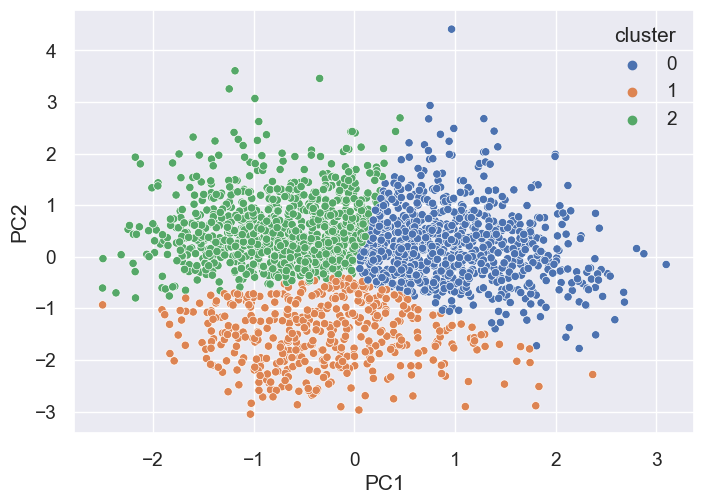

In [ ]:
# Saving clustering results to a dataframe for a three cluster model
pca_data3 = pd.DataFrame(features_pca, columns=['PC1','PC2'])
#Perform kmeans on the PCA transformed data
kmeans =KMeans(n_clusters=3).fit(features_pca)
# Plotting the PCA scores by cluster
pca_data3['cluster'] = pd.Categorical(kmeans.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data3)

PC1 still seems to be the strong deciding factor on whether a person is assigned to cluster 0 or cluster 1.  Cluster 1 is almost entirely comprised of persons higher higher on PC1 (above zero).  Consequently persons lower on PC1 (namely below zero) are all in cluster 0.  However, the spread of both variables in the lower range of PC2 is mitigated by cluster 2 (which appears to be comprised of lower PC2 scores as well as mostly lower PC1 scores).

In [ ]:
# Assigning each cluster to each respondent to assess what the makeup of each
# cluster is.
df.loc[:,"cluster"] = kmeans.labels_

#### Cluster 0 descriptives

In [ ]:
# Splitting data into just cluster 1 for analysis.
cluster_0 = df[(df.cluster == 0)]
cluster_0.describe()

Age_mean      ALSFRS  ALT.SGPT._median  AST.SGOT._median  \
count  850.000000  850.000000        850.000000        850.000000   
mean    52.998824   13.575294         31.329412         26.722353   
std     11.326871    5.788751         14.822617          8.320861   
min     23.000000    0.000000          8.000000         11.000000   
25%     45.000000    9.000000         22.000000         21.000000   
50%     54.000000   14.000000         28.000000         25.000000   
75%     62.000000   18.000000         37.000000         31.000000   
max     78.000000   28.000000        193.000000         79.000000   

       Creatinine_median  Gender_mean  Glucose_median  hands_median  \
count         850.000000   850.000000      850.000000    850.000000   
mean           57.770247     1.591765        5.508277      2.886471   
std            16.217420     0.491796        1.275597      2.143359   
min            18.000000     1.000000        3.690750      0.000000   
25%            44.200000     1.000000        4.939500      1.000000   
50%            56.000000     2.000000        5.300000      3.000000   
75%            70.000000     2.000000        5.700000      4.500000   
max           123.760000     2.000000       17.000000      8.000000   

       leg_median  mouth_median  onset_delta_mean  onset_site_mean  \
count  850.000000    850.000000        850.000000       850.000000   
mean     2.458824      9.622059       -753.227059         1.949412   
std      1.526584      2.343235        444.426128         0.276323   
min      0.000000      0.000000      -2487.000000         1.000000   
25%      1.000000      8.000000       -985.000000         2.000000   
50%      2.500000     10.000000       -640.500000         2.000000   
75%      3.000000     12.000000       -409.250000         2.000000   
max      8.000000     12.000000        -85.000000         3.000000   

       Potassium_median  pulse_median  respiratory_median  trunk_median  \
count        850.000000    850.000000          850.000000    850.000000   
mean           4.139382     78.474706            3.423824      2.864118   
std            0.236424      8.462326            0.693763      1.565062   
min            3.000000     52.000000            0.000000      0.000000   
25%            4.000000     73.500000            3.000000      2.000000   
50%            4.150000     78.000000            3.625000      3.000000   
75%            4.300000     83.000000            4.000000      4.000000   
max            5.000000    110.000000            4.000000      6.500000   

       cluster  
count    850.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

#### Cluster 1 descriptives

In [ ]:
# Splitting data into just cluster 1 for analysis.
cluster_1 = df[(df.cluster == 1)]
cluster_1.describe()

Age_mean      ALSFRS  ALT.SGPT._median  AST.SGOT._median  \
count  445.000000  445.000000        445.000000        445.000000   
mean    59.074157   18.770787         24.701124         25.307865   
std     10.785851    7.889242          8.998717          6.635935   
min     26.000000    0.000000         10.000000          9.000000   
25%     52.000000   13.000000         18.000000         20.000000   
50%     61.000000   19.000000         23.000000         24.000000   
75%     67.000000   25.000000         30.000000         29.000000   
max     81.000000   36.000000         57.000000         49.500000   

       Creatinine_median  Gender_mean  Glucose_median  hands_median  \
count         445.000000   445.000000      445.000000    445.000000   
mean           67.469371     1.364045        5.429529      6.359551   
std            15.598873     0.481703        1.343803      1.569682   
min            35.360000     1.000000        3.745000      1.000000   
25%            56.000000     1.000000        4.900000      5.500000   
50%            65.000000     1.000000        5.300000      6.500000   
75%            77.000000     2.000000        5.633250      8.000000   
max           159.120000     2.000000       26.196000      8.000000   

       leg_median  mouth_median  onset_delta_mean  onset_site_mean  \
count  445.000000    445.000000        445.000000       445.000000   
mean     5.393258      6.446629       -556.134831         1.170787   
std      2.075262      2.941354        318.849868         0.394273   
min      0.000000      0.000000      -2011.000000         1.000000   
25%      3.500000      4.000000       -716.000000         1.000000   
50%      5.500000      7.000000       -470.000000         1.000000   
75%      8.000000      9.000000       -335.000000         1.000000   
max      8.000000     12.000000        -94.000000         3.000000   

       Potassium_median  pulse_median  respiratory_median  trunk_median  \
count        445.000000    445.000000          445.000000    445.000000   
mean           4.251236     77.297753            3.424157      6.324719   
std            0.245549      8.321766            0.638486      1.527767   
min            3.500000     52.000000            1.000000      0.000000   
25%            4.100000     72.500000            3.000000      5.000000   
50%            4.200000     77.000000            3.500000      6.500000   
75%            4.400000     81.000000            4.000000      8.000000   
max            5.000000    112.000000            4.000000      8.000000   

       cluster  
count    445.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

#### Cluster 2 descriptives

In [ ]:
# Splitting data into just cluster 3 for analysis.
cluster_2 = df[(df.cluster == 2)]
cluster_2.describe()

Age_mean      ALSFRS  ALT.SGPT._median  AST.SGOT._median  \
count  928.000000  928.000000        928.000000        928.000000   
mean    53.801724   26.179957         38.493534         33.040948   
std     11.203016    6.271367         16.662328         10.415838   
min     18.000000    4.000000          8.000000         14.000000   
25%     46.000000   22.000000         27.000000         26.000000   
50%     54.000000   27.000000         34.500000         31.000000   
75%     62.000000   31.000000         46.000000         38.000000   
max     78.000000   40.000000        121.000000        100.000000   

       Creatinine_median  Gender_mean  Glucose_median  hands_median  \
count         928.000000   928.000000      928.000000    928.000000   
mean           70.902099     1.810345        5.495342      6.057381   
std            16.713767     0.392240        1.162320      1.742996   
min            26.520000     1.000000        3.496500      0.000000   
25%            61.000000     2.000000        4.939500      5.000000   
50%            70.720000     2.000000        5.300000      6.000000   
75%            80.000000     2.000000        5.700000      8.000000   
max           176.800000     2.000000       14.208000      8.000000   

       leg_median  mouth_median  onset_delta_mean  onset_site_mean  \
count  928.000000     928.00000         928.00000       928.000000   
mean     4.862608      11.33944        -679.50000         1.966595   
std      2.103122       1.21105         405.74483         0.196969   
min      0.000000       1.00000       -3119.00000         1.000000   
25%      3.000000      11.00000        -908.25000         2.000000   
50%      4.000000      12.00000        -581.50000         2.000000   
75%      7.000000      12.00000        -370.75000         2.000000   
max      8.000000      12.00000         -16.00000         3.000000   

       Potassium_median  pulse_median  respiratory_median  trunk_median  \
count        928.000000    928.000000          928.000000    928.000000   
mean           4.205248     75.442349            3.828125      6.065733   
std            0.239111      8.211942            0.409351      1.242232   
min            3.450000     50.000000            1.000000      1.500000   
25%            4.050000     71.000000            4.000000      5.000000   
50%            4.200000     76.000000            4.000000      6.000000   
75%            4.300000     80.000000            4.000000      7.000000   
max            5.100000    115.000000            4.000000      8.000000   

       cluster  
count    928.0  
mean       2.0  
std        0.0  
min        2.0  
25%        2.0  
50%        2.0  
75%        2.0  
max        2.0

I already discussed above how cluster 0 and 2 are mostly comprised (cluster 0 in the three cluster model is very similar as evidenced by the graphs to cluster 1 from the two cluster model--ALS patients with less symptoms).  Cluster 2 in this model is very similar in makeup to cluster 0 in the two cluster model (more advanced ALS patients).   The new component to this model is that PCA2 is now playing a fact in how the data is spread. PCA2 appears to be heavily influenced by gender.  The "new" cluster pulled from the lower PCA scores appears to be much more heavily comprised of women (generally the first code is male respondents but a look at the distribution implies code 1 is likely men given much larger prevalence of them).  It's possible this data is skewed towards women for whatever reason, but given the higher prevalence of ALS in men, this seems unlikely.   It appears to be persons who are mostly less progressed with the disease given that most are negative on PC1.

## Analysis/Conclusion

As I started to research which variables are most related to ALS and highly correlated with the ALS measure, I decided on mostly keeping the median score of the muscular measures (mouth, hands, face, feet, etc) and creatinine because it can be a measure of muscular distress.   I left in age and gender as the disease impacts more men and older adults but literature suggest women behave more differently than men.  (It was pretty exciting to find that my three cluster model actually accounted for this, so I'm glad I left gender in.)  Women are more likely to get it later in life (as evidenced in the higher mean for age in cluster 1 from the three cluster model) and their initial symptoms are different (they tend to have more bulbar symptoms such as struggles with their mouth regarding talking and eating and less muscular symptoms in their limbs upon onset (Alexander, 2019)).  This was also shown to be in the lower mouth scores compared to the other two clusters in the three cluster model.  I made the assumption early on that lower scores for ALSFRS (as confirmed by my literature research) signify more progression of the disease (originally I thought the opposite).  It's heavily positively correlated with age and the disease progresses with age so that's another confirmation of the age.   Furthermore the body measurements of physical functioning (mouth, hand, feet, trunk and respiratory) all decline with age matching the declining ALSRFS score.    

References: Alexander, William. Department of Neurology, Duke University of Medicine. June 2019. "Neurology and Men's Health: ALS." https://neurology.duke.edu/news/neurology-and-mens-health-als-0.
Date used entitled "als_data.csv"  Not sure the original source as it was downloaded from bellevue.edu.